# Crunchbase Companies

### This project makes use of Crunchbase's Dataset of companies (startups) and various metrics about them. Crunchbase's Company dataset will help us learn more about what might make a startup successful, where the highest volume of companies are, which companies and markets are most lucrative, and much more.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import scipy.stats

df = pd.read_csv('crunchbase-companies1.csv', encoding = "ISO-8859-1", nrows =1000)
funding_total_numeric =  pd.to_numeric(df['funding_total_usd'], errors='coerce').dropna()

#### This dataset includes lots of interesting information but this project will make *specific* use of: *_category code (market), total funded, operating status, region, funding rounds, founded year, first round of funding, last round of funding, and last milestone._*

In [118]:
df.head()

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/waywire,#waywire,news,1750000.0,operating,USA,NY,New York,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,2013-09-06
1,/company/n-plusn,#NAME?,software,600000.0,operating,USA,NY,New York,New York,1,2012-01-01,2012-01,2012-Q1,2012.0,2012-08-29,2012-08-29,NaN
2,/company/club-domains,.Club Domains,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,NaN
3,/company/0xdata,0xdata,analytics,1700000.0,operating,USA,CA,SF Bay,Mountain View,1,NaN,NaN,NaN,NaN,2013-01-03,2013-01-03,2012-01-01
4,/company/1-800-dentist,1-800-DENTIST,health,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1986-01,1986-Q1,1986.0,2010-08-19,2010-08-19,2010-08-19


Cleaning up this data a bit. We have 225 null values dropped from this dataset.

In [119]:
cdf = df[["name", "founded_year", "funding_rounds"]]

founded_date = cdf["founded_year"]

is_empty = founded_date.isna()
clean_df = founded_date.dropna()

## How many companies have been founded each year over the past 100 years?

### We begin to see a steady increase of companies founded each year in the 1990's through the modern day. Due to the rise of technology advancements to those current technologies are made rapidly, creating more and more space for companies to start. This is one possible cause of the rise in founding companies over the past 30 years. 

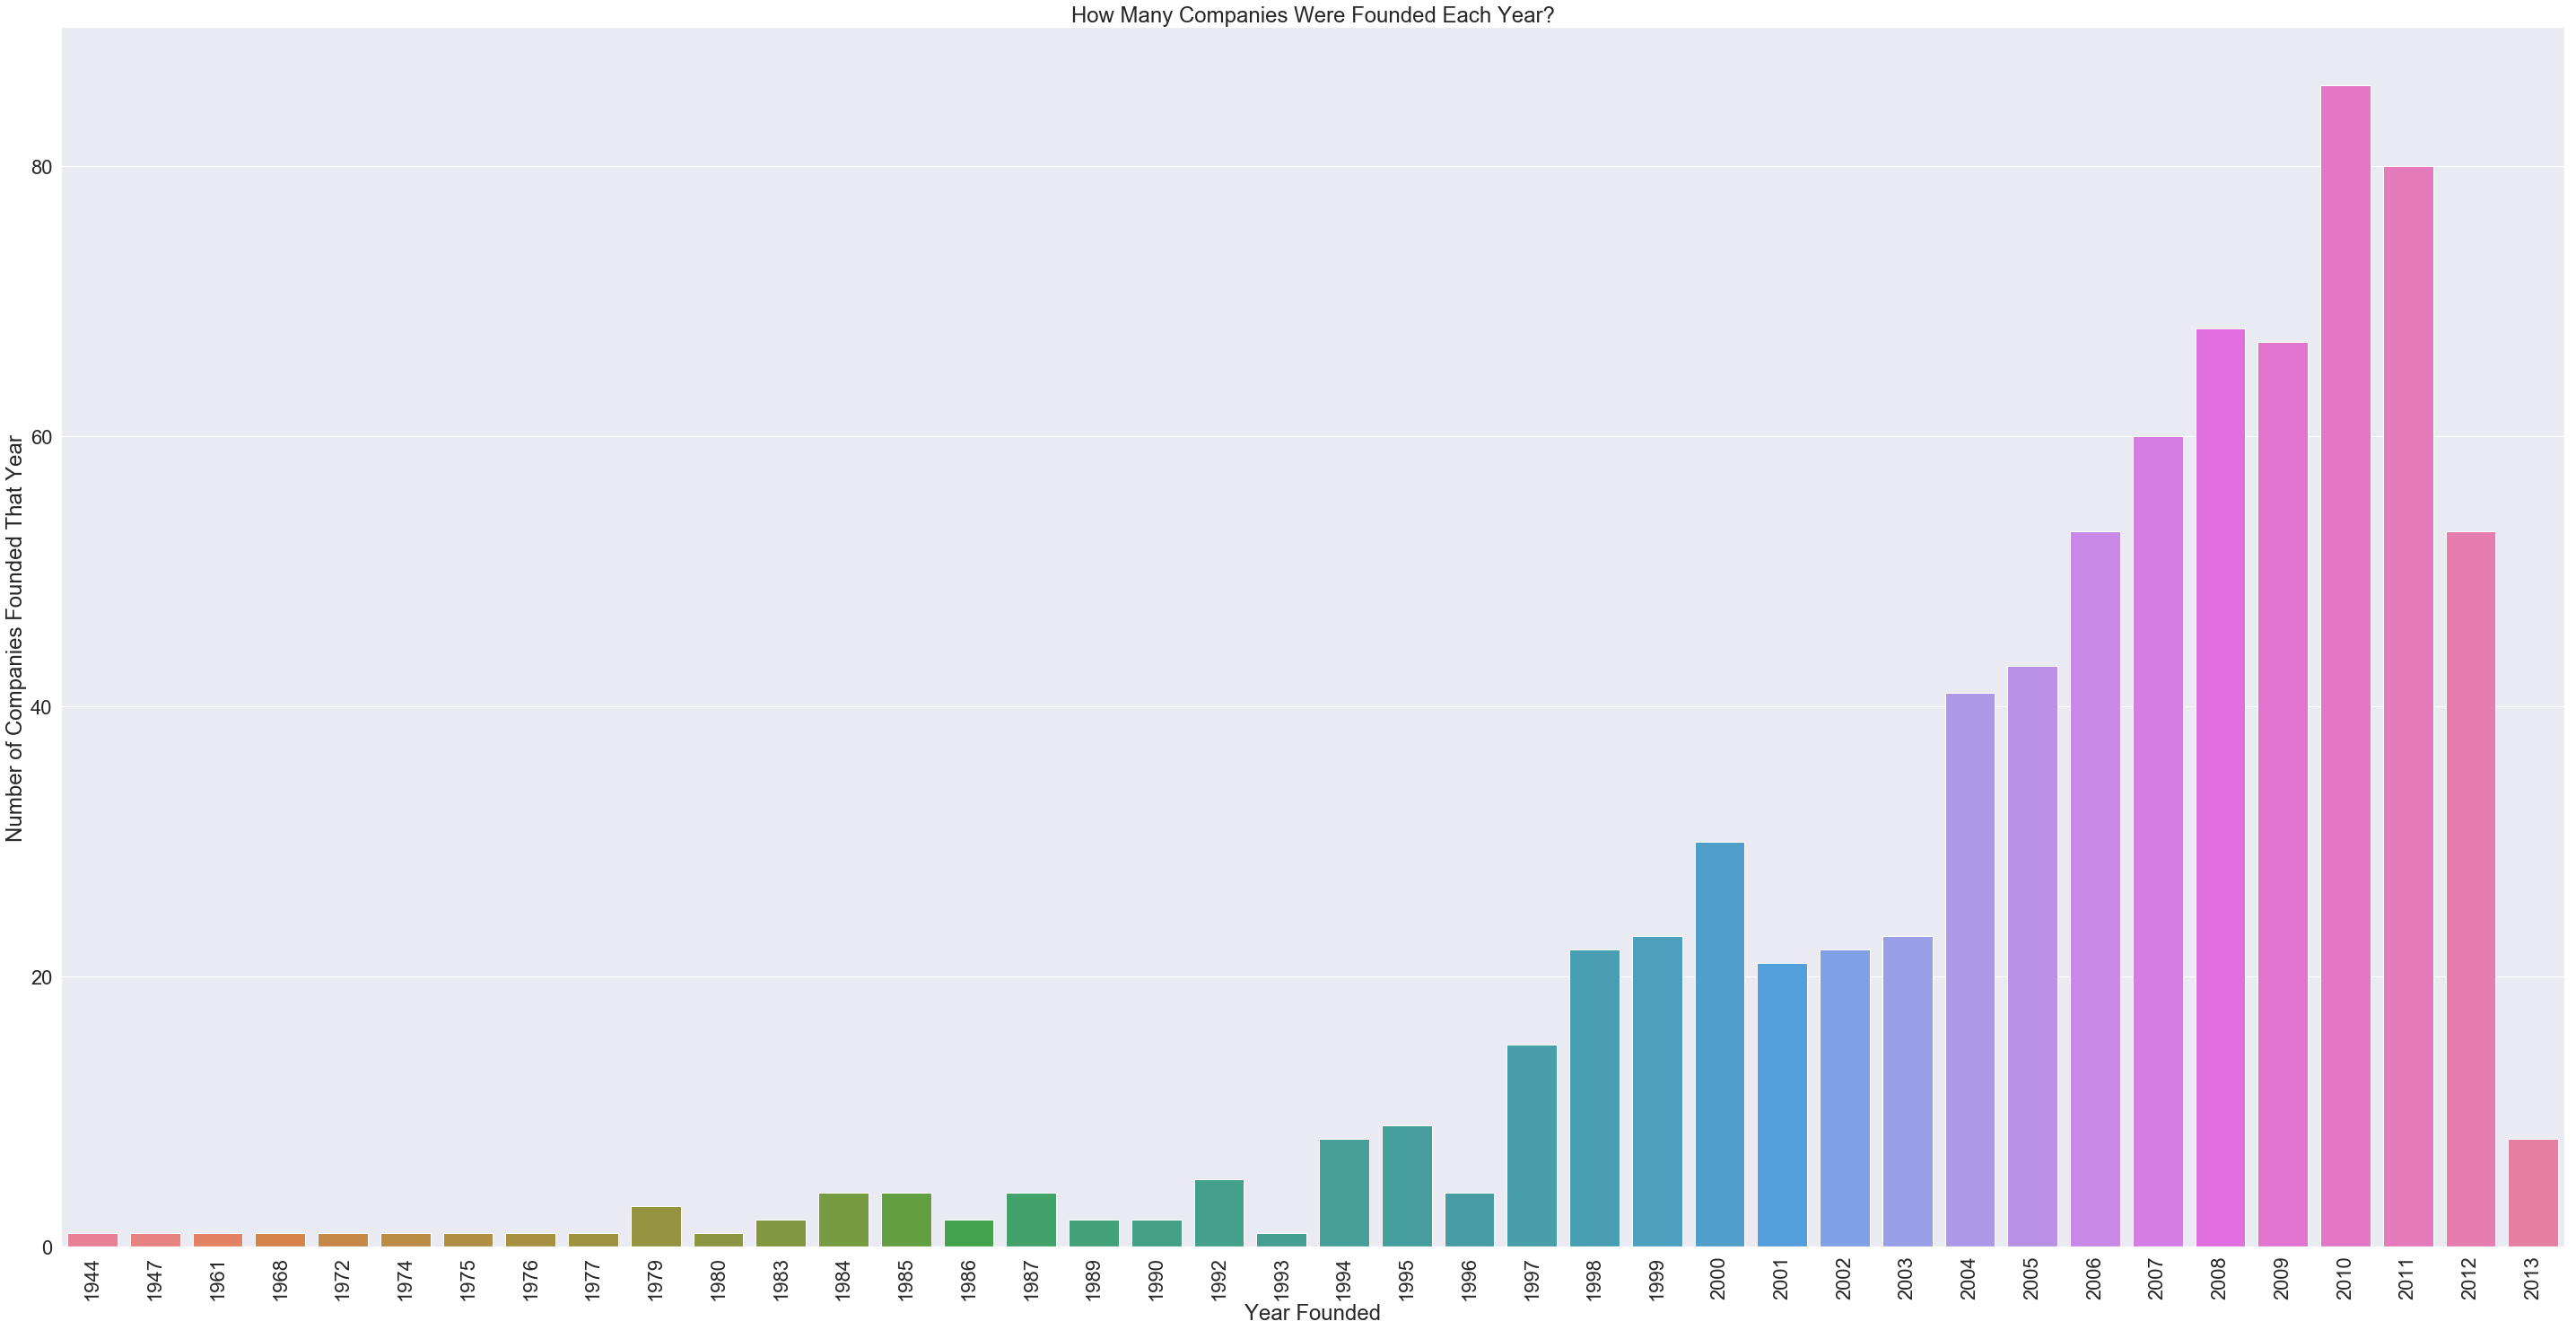

In [120]:
# sns.set(rc={'figure.figsize':(25.7,10.27)}, front_scale=2)
# sns.countplot(x="founded_month", y="funding_rounds", data=cdf)

clean_df = clean_df.astype('int64')

# lines = cdf.plot.line(x=clean_df, index=cdf['funding_rounds'])

sns.set(rc={'figure.figsize':(50,25)}, font_scale=2)
year_fig = sns.countplot(x=clean_df, palette='husl', data=cdf).set_xlabel("year")

plt.xlabel("Year Founded")
plt.ylabel("Number of Companies Founded That Year")
plt.title("How Many Companies Were Founded Each Year?")
plt.xticks(rotation='vertical')
# plt.title("Schedule Pacing on a weekly basis")
plt.show(year_fig)



# Regional Findings
SF BAY, Boston and New York are the most popular regions

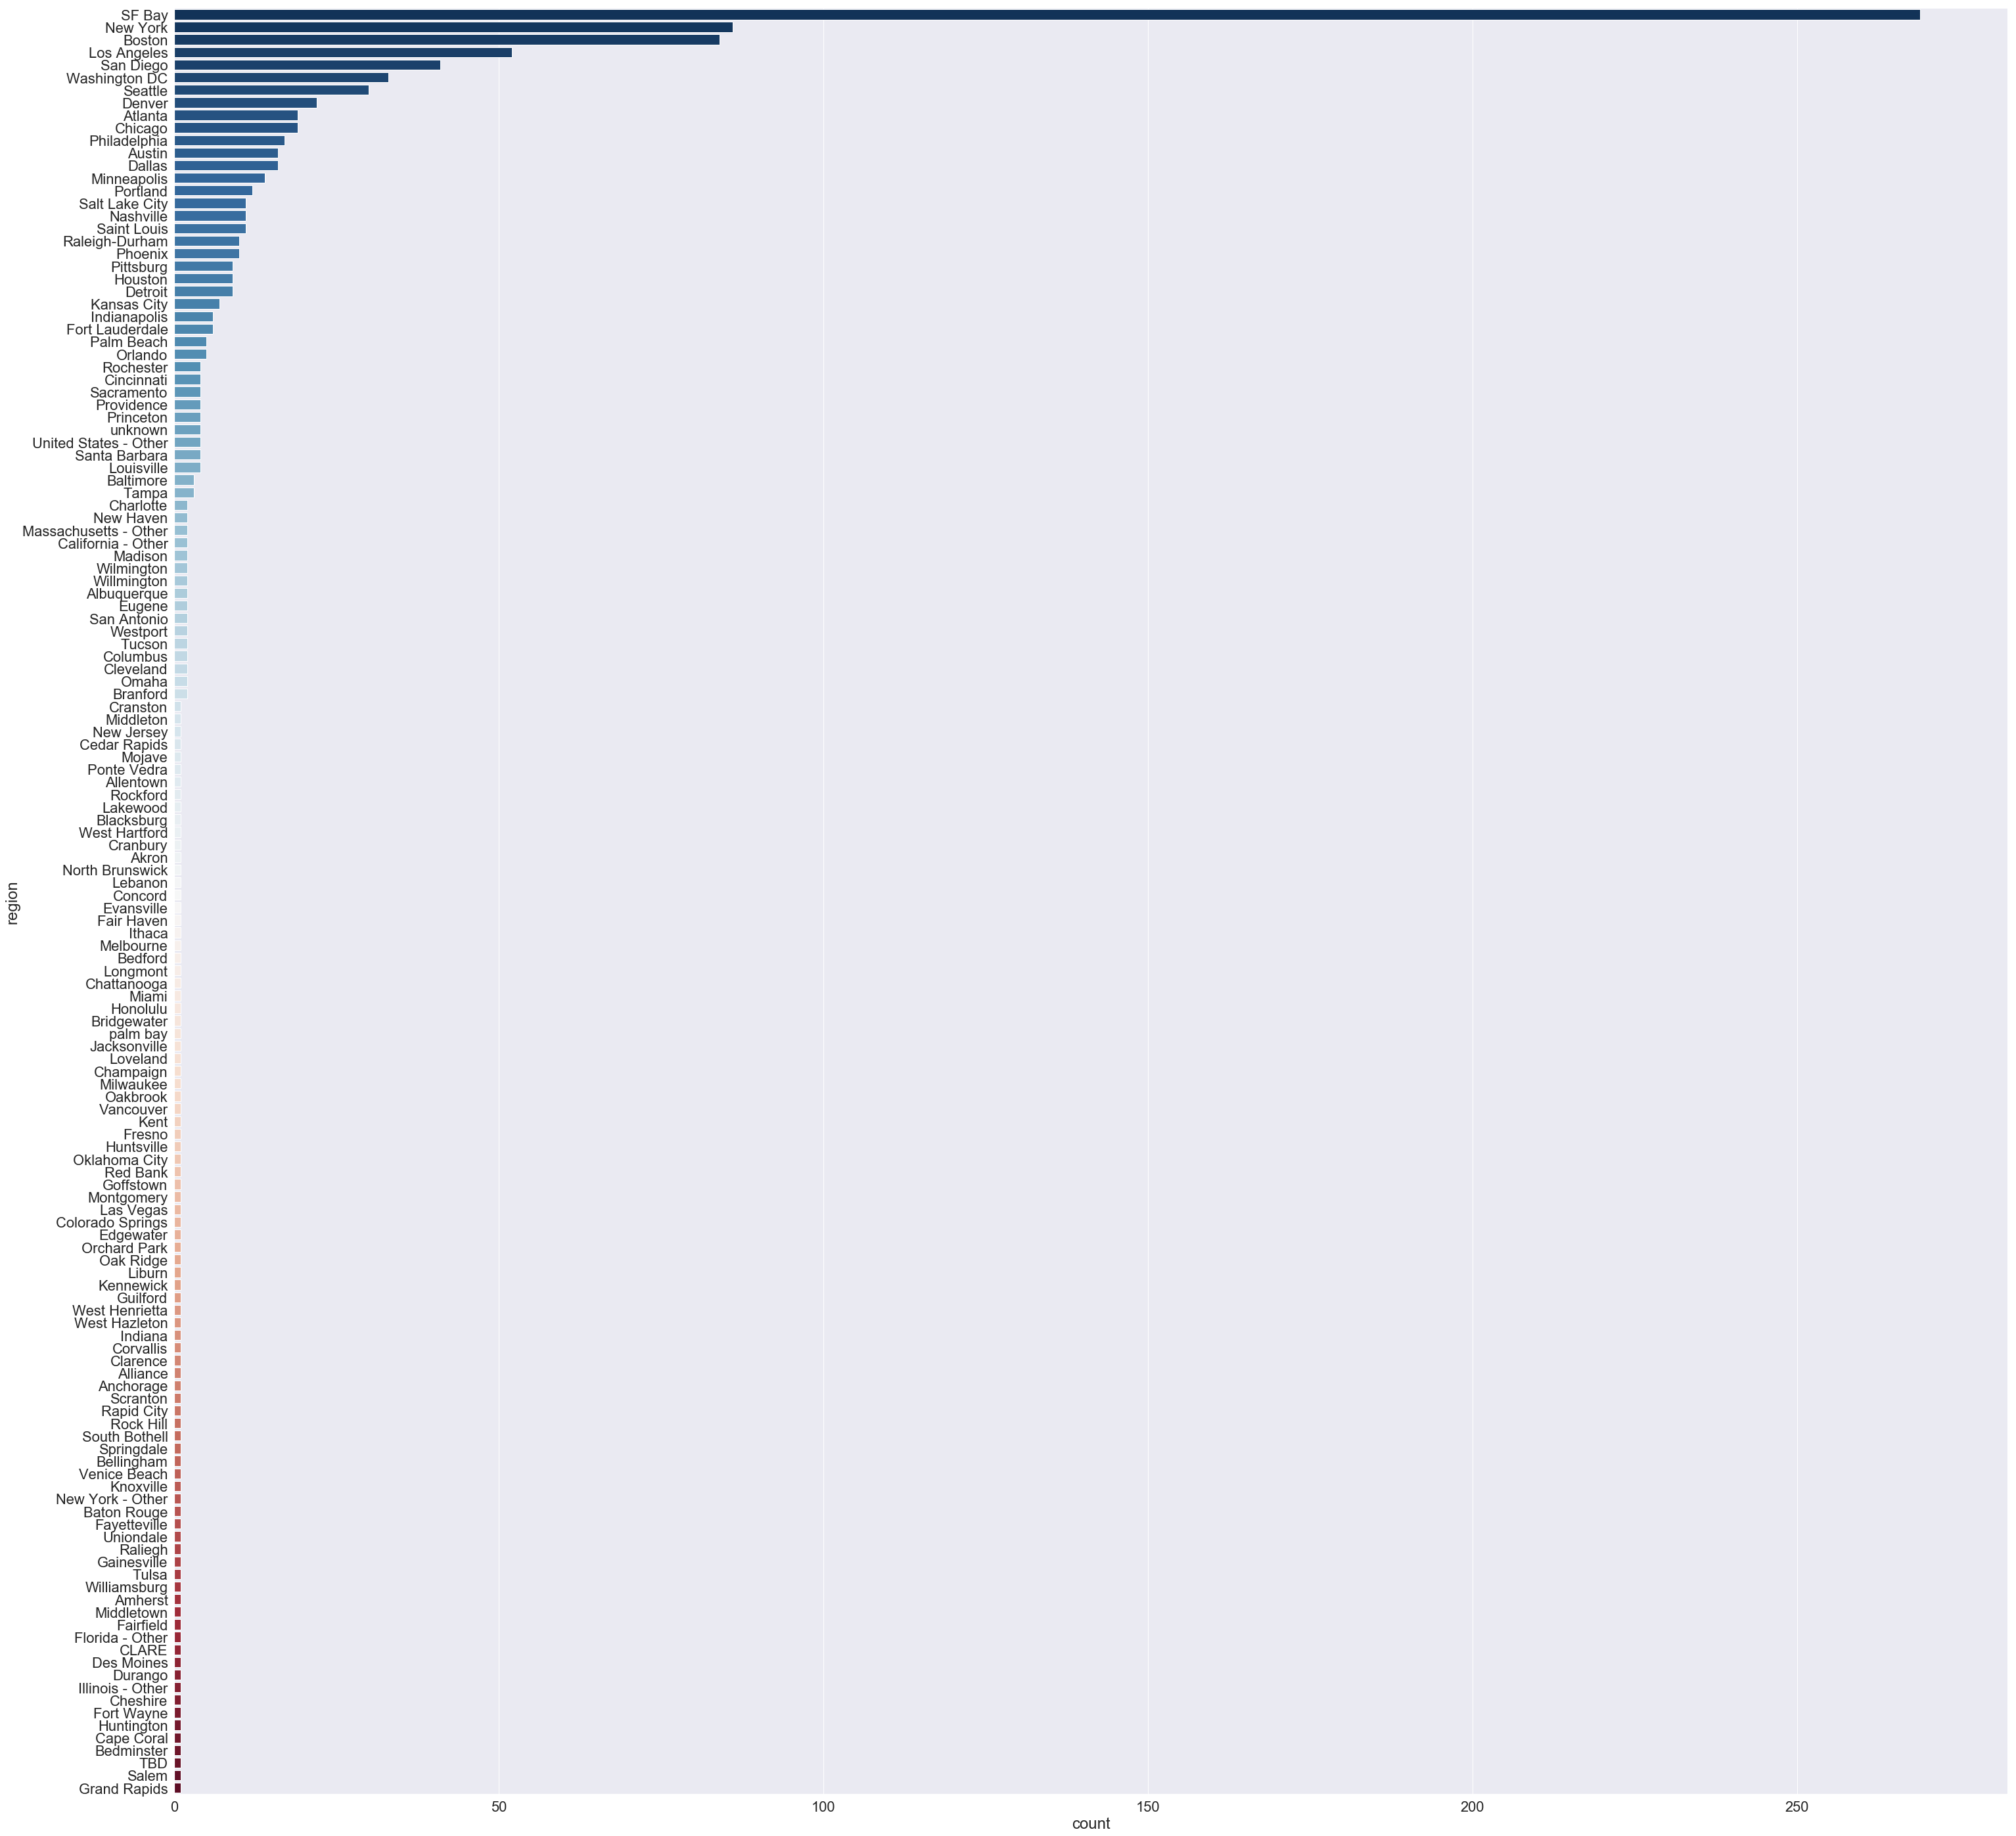

In [159]:
sns.set(rc={'figure.figsize':(50,50)}, font_scale=2)
# sns.countplot(x='region', palette='husl', data=total_per_city)

sns.countplot(y='region', palette='RdBu_r',order=df['region'].value_counts().index, data=df)

## Funding for Different Markets

In the following three visualizations we explore the total and average funding for each category (market).

### Total funding for each category.

Semiconductor, cleantech, biotech, and software have raised a total in USD more than that of their counterparts.

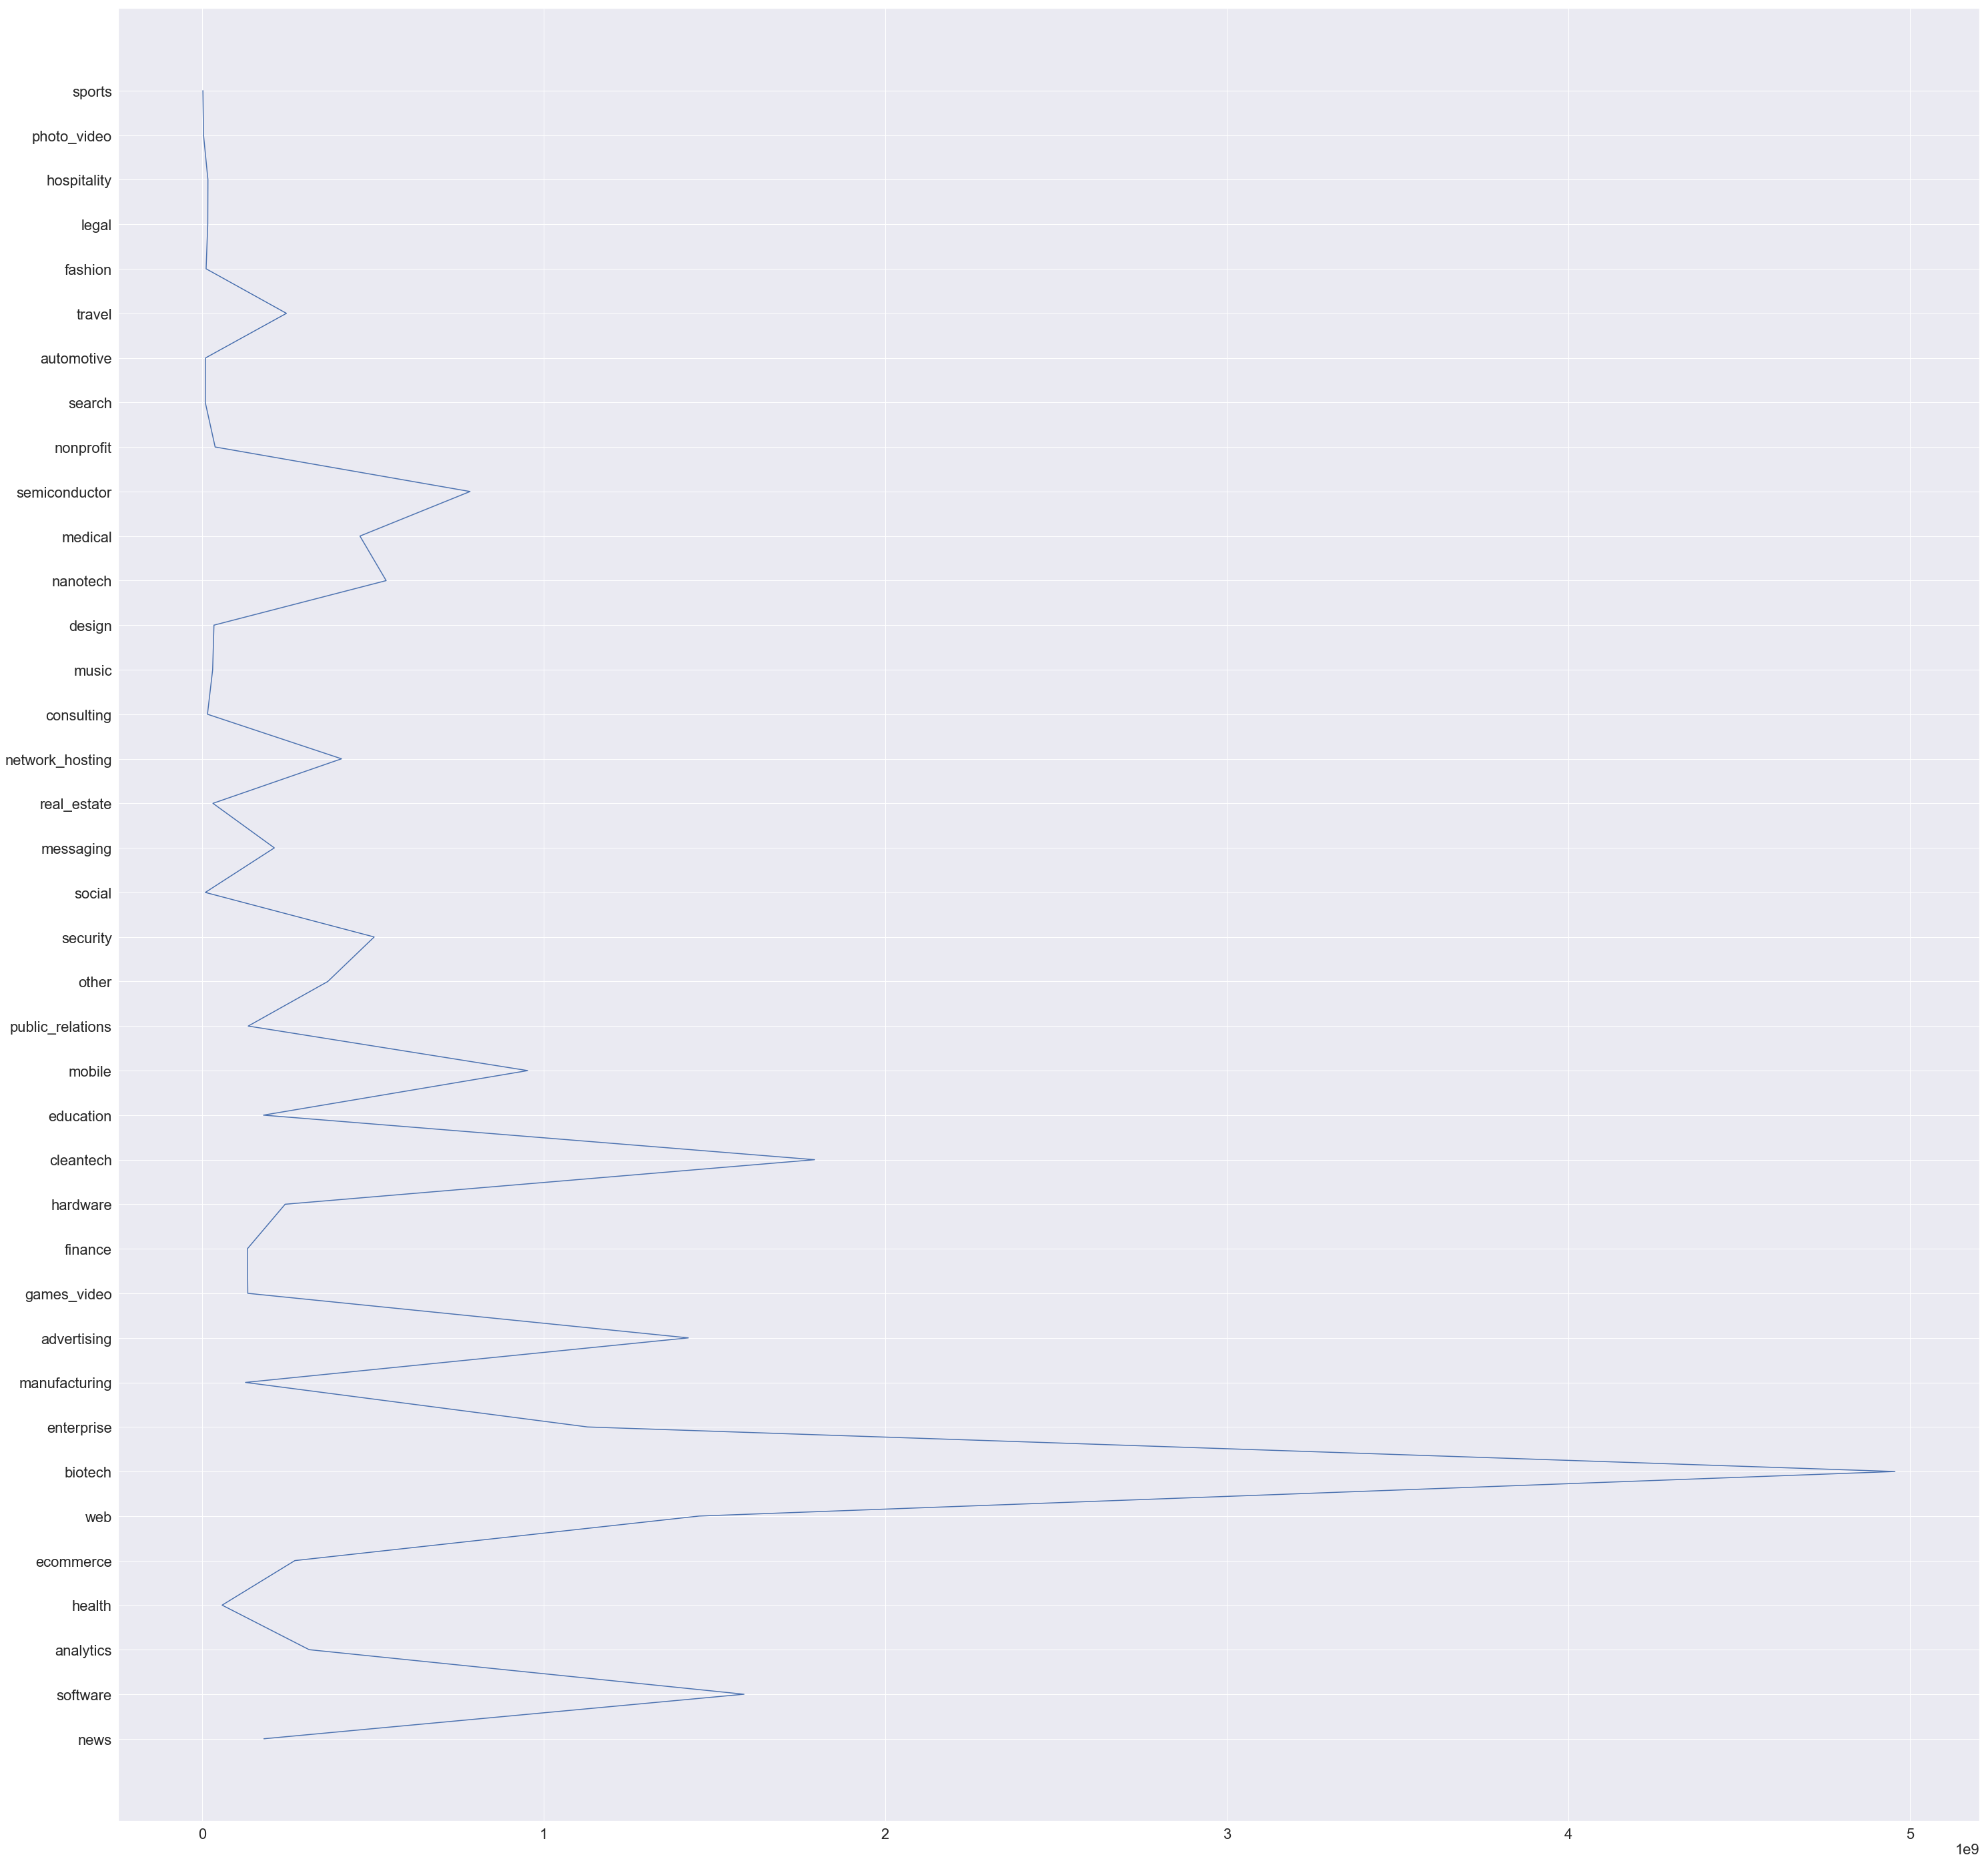

In [207]:
categories = df['category_code'].dropna().unique()
total = []
for category in categories:
    funding_totls = df[df['category_code'] == category]['funding_total_usd'].dropna()
    total.append(sum(funding_totls))

plt.plot(total, categories)

### Average funding for each category.

Travel, nanotech, messaging, cleantech, and web on average raise the most money during funding rounds.

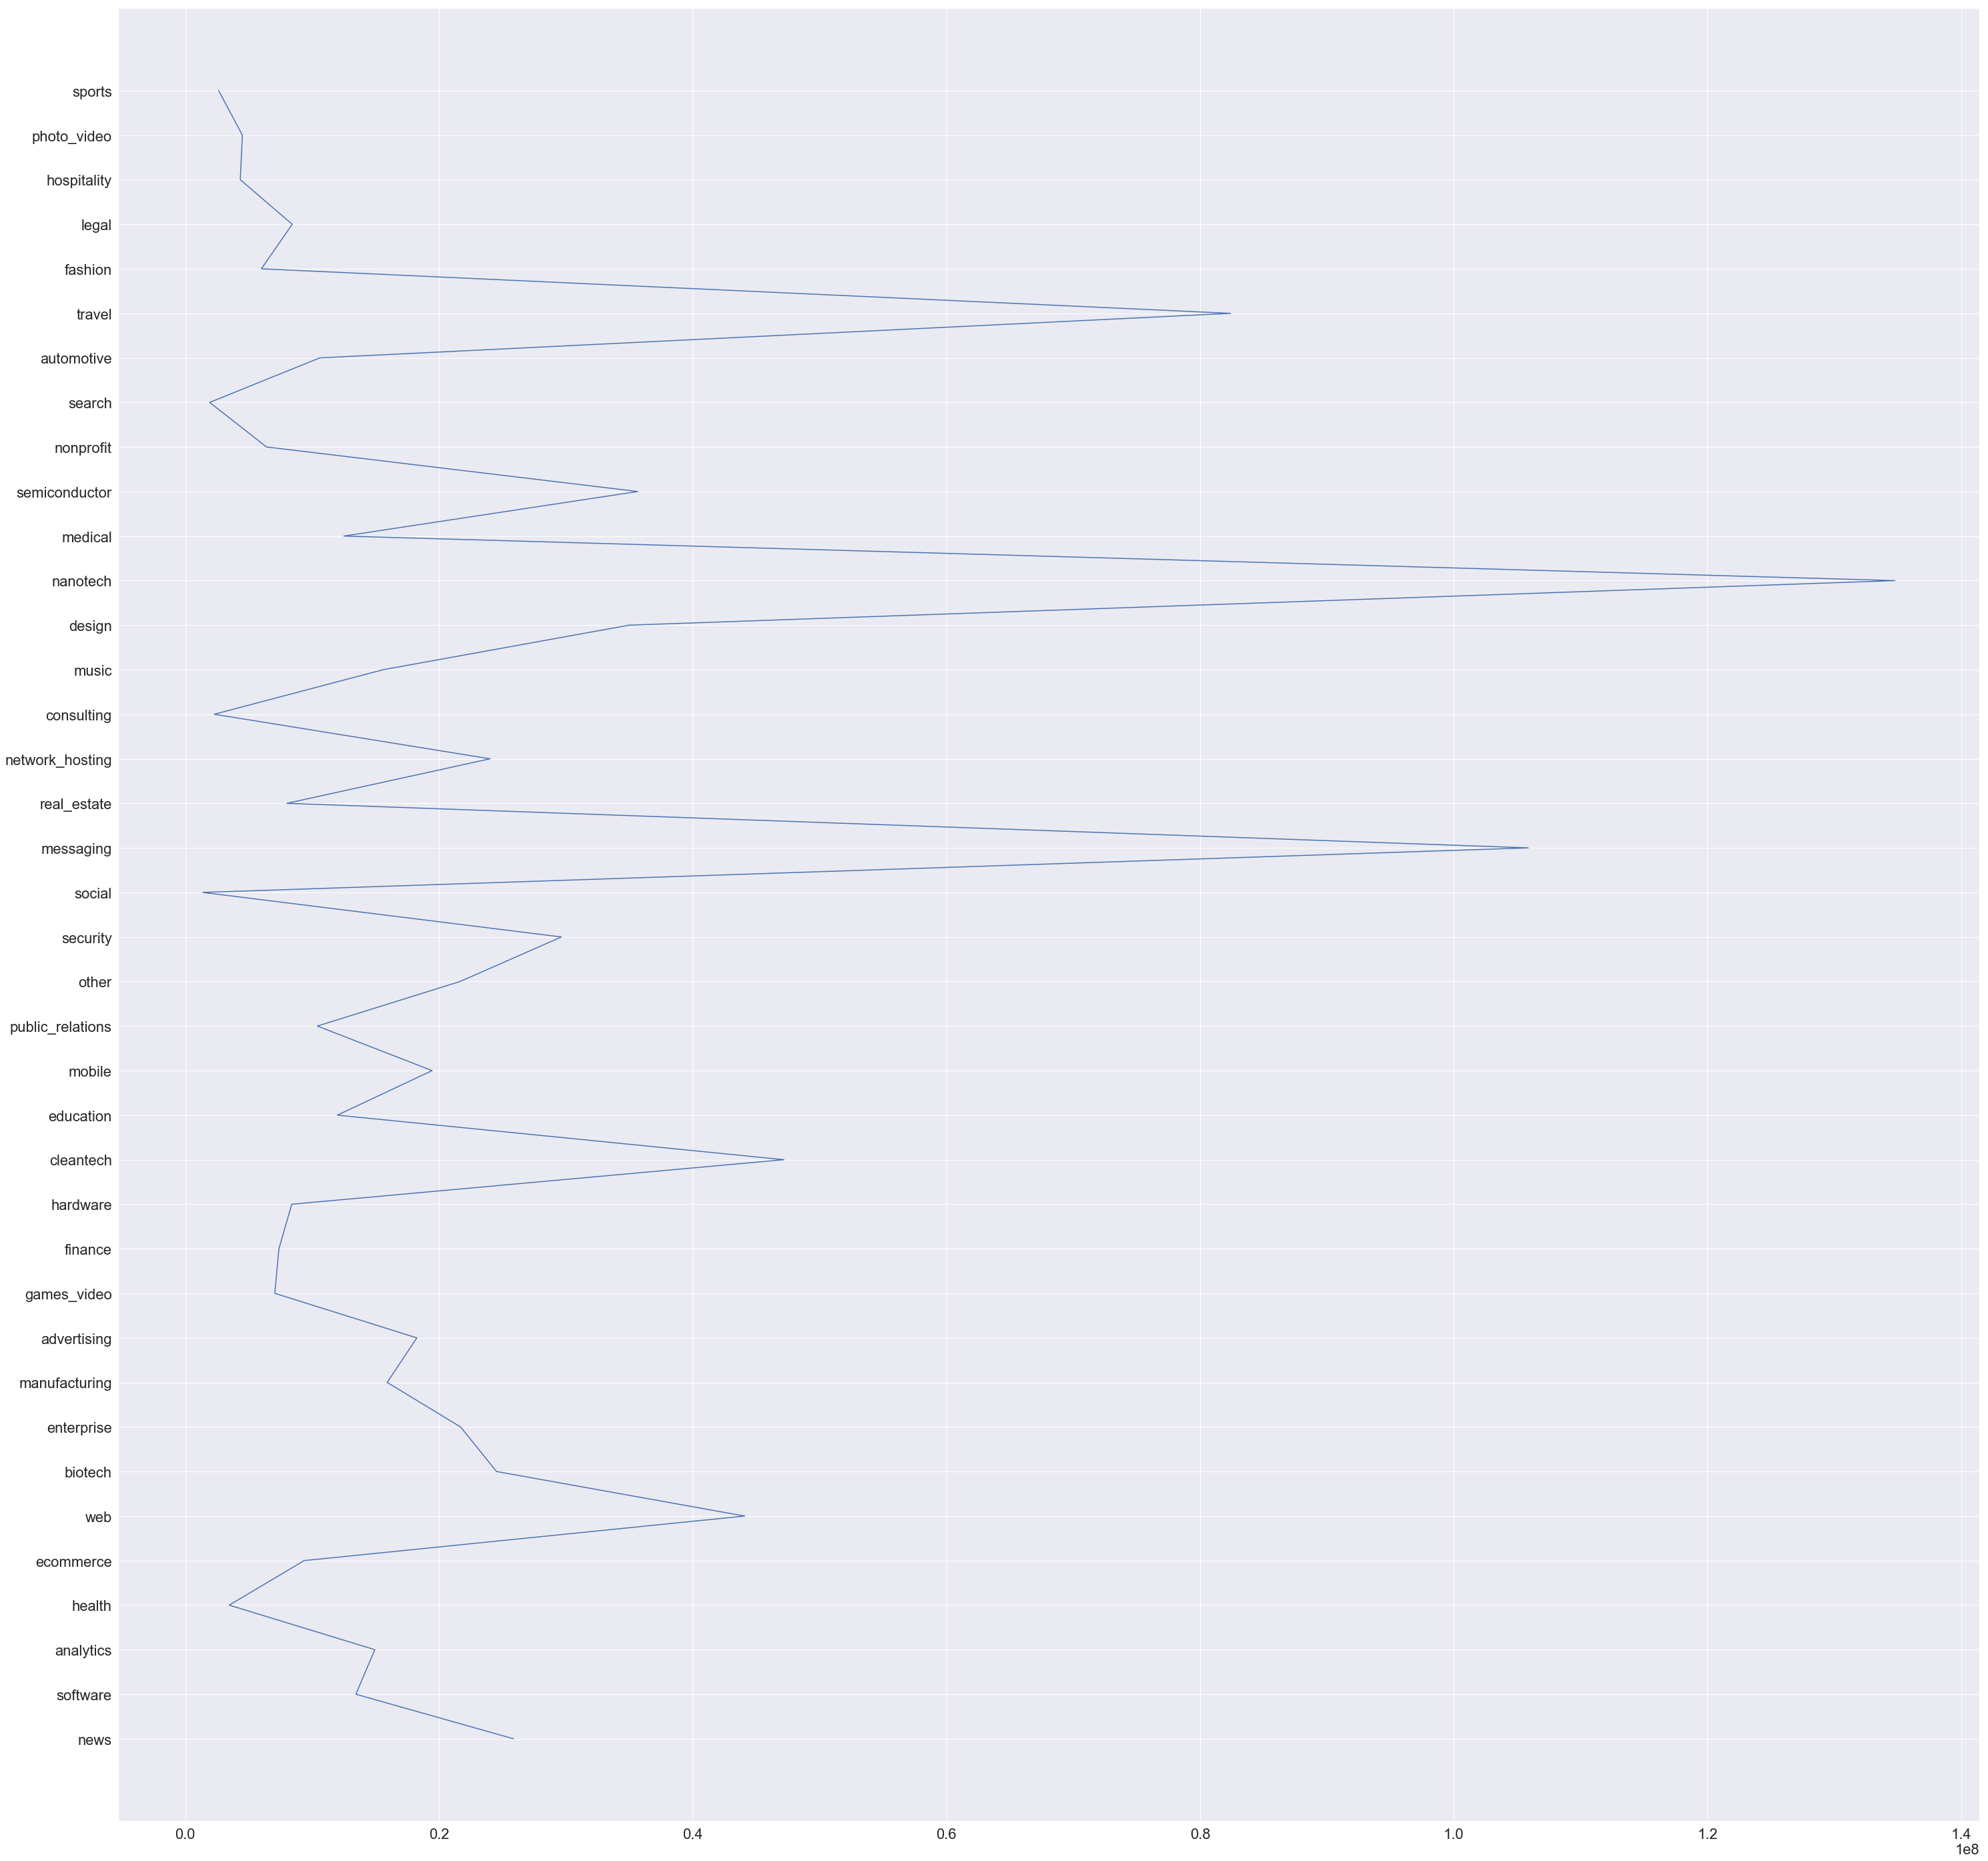

In [208]:
categories = df['category_code'].dropna().unique()
total = []
for category in categories:
    funding_totls = df[df['category_code'] == category]['funding_total_usd'].dropna()
    total.append(np.mean(funding_totls))

plt.plot(total, categories)

### Average Funding vs. Total Funding

It is clear that the total amount raised for all companies in one category combined will be significantly more than the average US dollar amount raised for each category. However, it is interesting here to see the two plotted against each other. The averages mirror the pattern of the total raised, but not _exactly._ 

If you look at biotech and health you can see that the total for biotech is way larger than health, but their averages are about the same. This tells us that there are way more companies in biotech so the total mainly shows popuarity.

Furthermore, we can see that when the spike in total funding is drastically larger than the average funding it indicated that there are either more companies in that category that received funding, or, the amount of money raised during funding rounds for that category is consistently and significantly higher than that of other categories. 

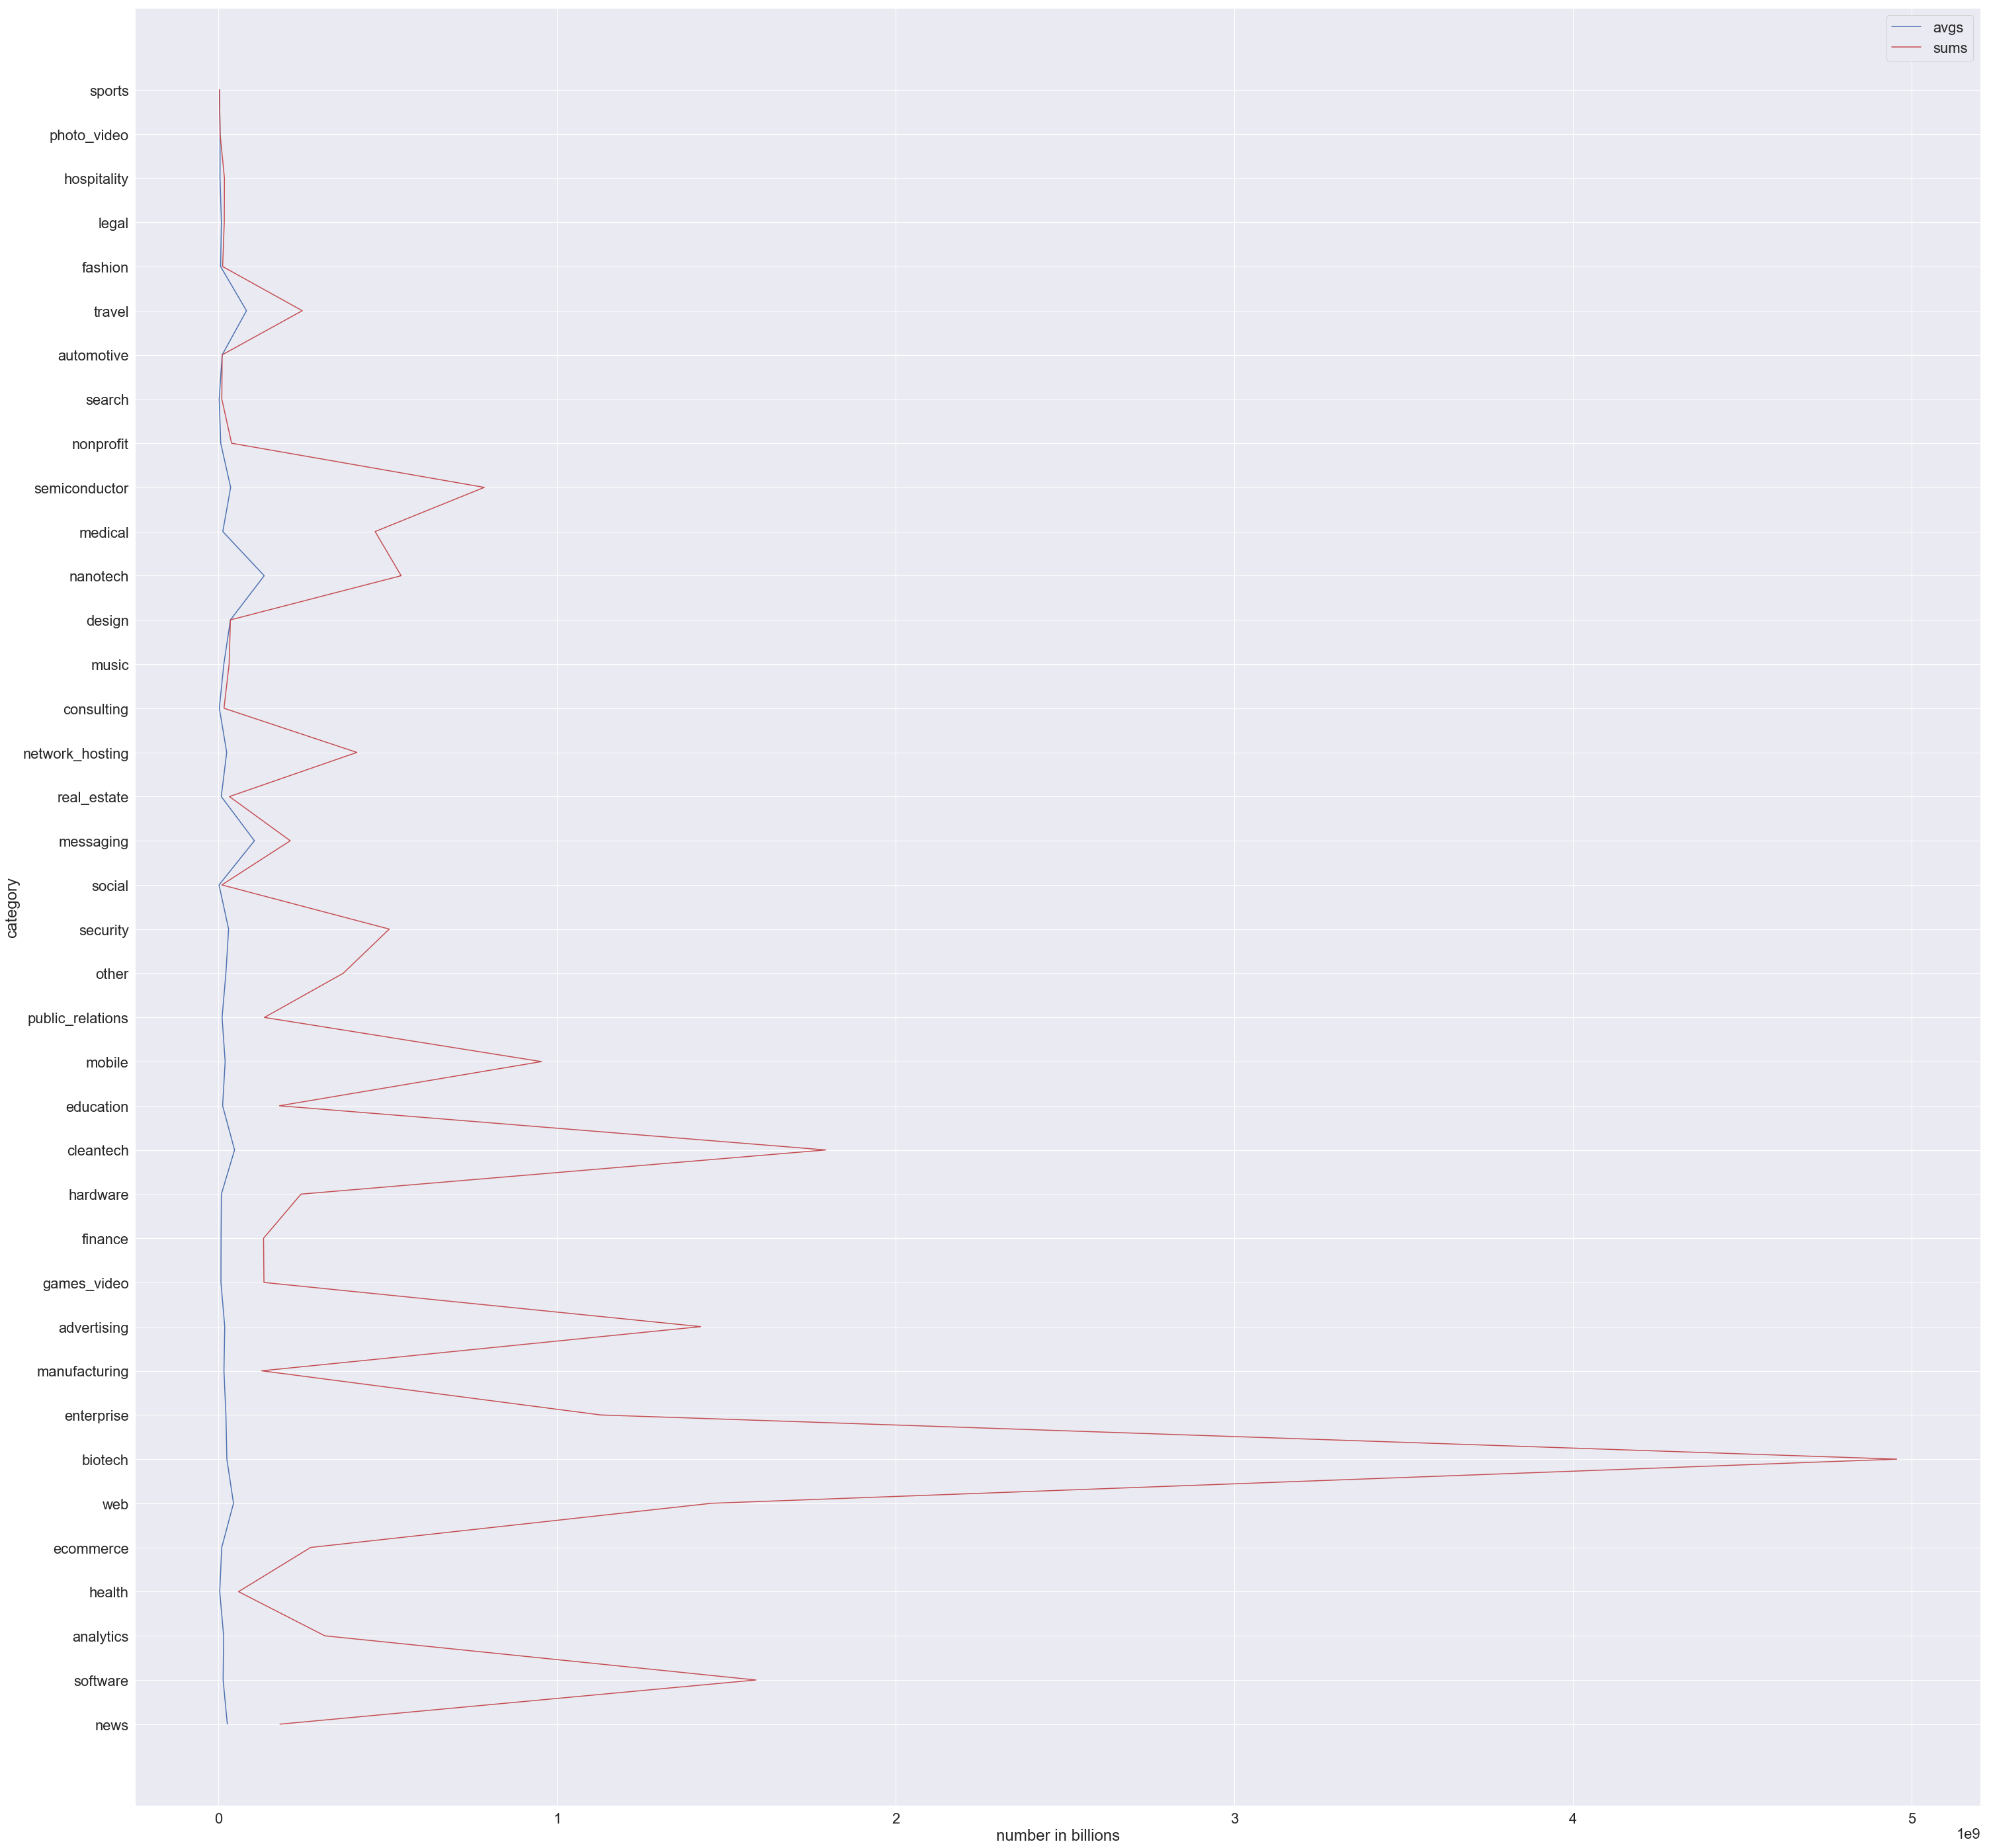

In [213]:
categories = df['category_code'].dropna().unique()
total = []
for category in categories:
    funding_totls = df[df['category_code'] == category]['funding_total_usd'].dropna()
    total.append(np.mean(funding_totls))

plt.plot(total, categories, color='b', label="avgs")
categories = df['category_code'].dropna().unique()
total = []
for category in categories:
    funding_totls = df[df['category_code'] == category]['funding_total_usd'].dropna()
    total.append(sum(funding_totls))

plt.plot(total, categories, color='r', label='sums')
plt.xlabel('number in billions')
plt.ylabel('category')
plt.legend()

### Total amount of money raised each funding round. 

The funding round with the largest average funding is the 8th round of funding, which is at first surprising because few companies make it to an eighth funding round. What this probably tells us is that as companies grow and look for more funding rounds they also increase the amount they raise. Hence on the 8th or 11th funding round the totals are significantly higher.

Not surprisingly, the first four funding rounds have the lowest amounts raised per round. At early campaigns companies are getting on their feet and investors are wary to invest their money an a new company. As the company grows older investors are more willing to leave larger dollar amounts with this company as their credibility and value increases with time.

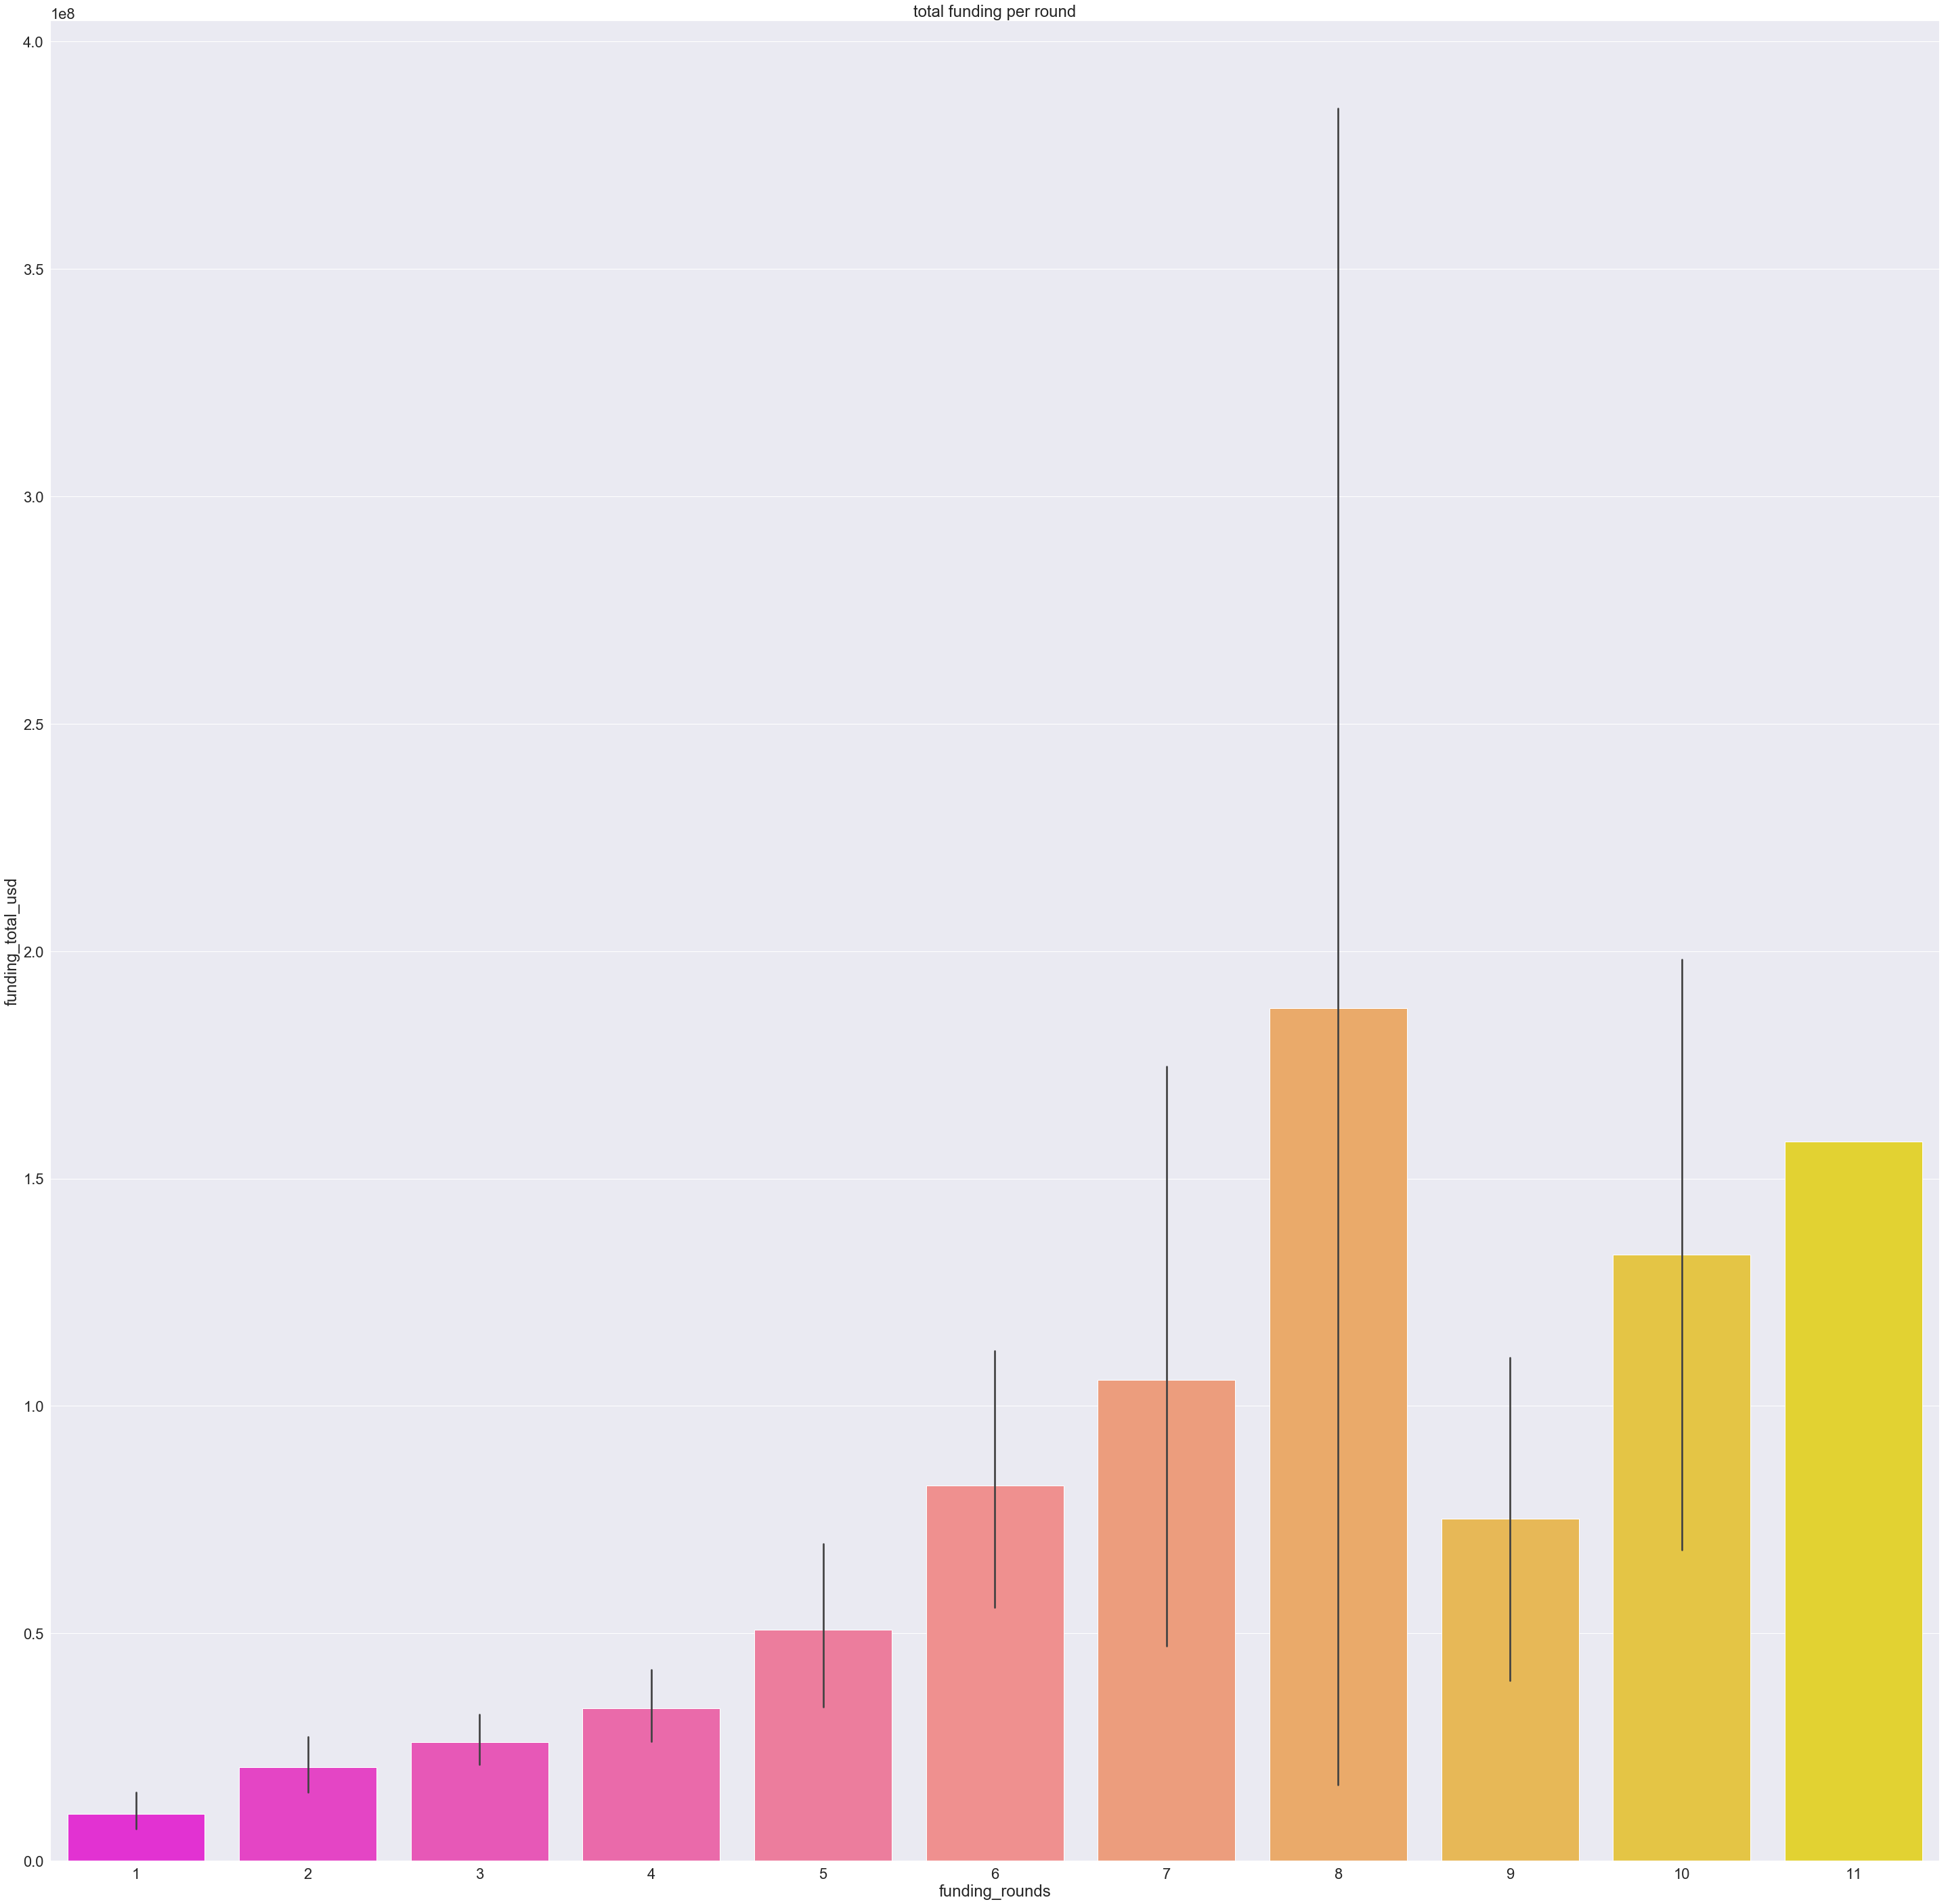

In [163]:
fig = sns.barplot(x="funding_rounds", y="funding_total_usd",palette="spring",  data=df)
plt.xlabel("funding_rounds")
plt.ylabel("funding_total_usd")
plt.title("total funding per round")
plt.show(fig)

### Total amount of funding for each category.

The top five categories with the most funding in order are nanotech, messaging, travel, cleantech, and web. Each of these categories boast expansive and costly characteristics making it eazy to see why they garner the most funds. 

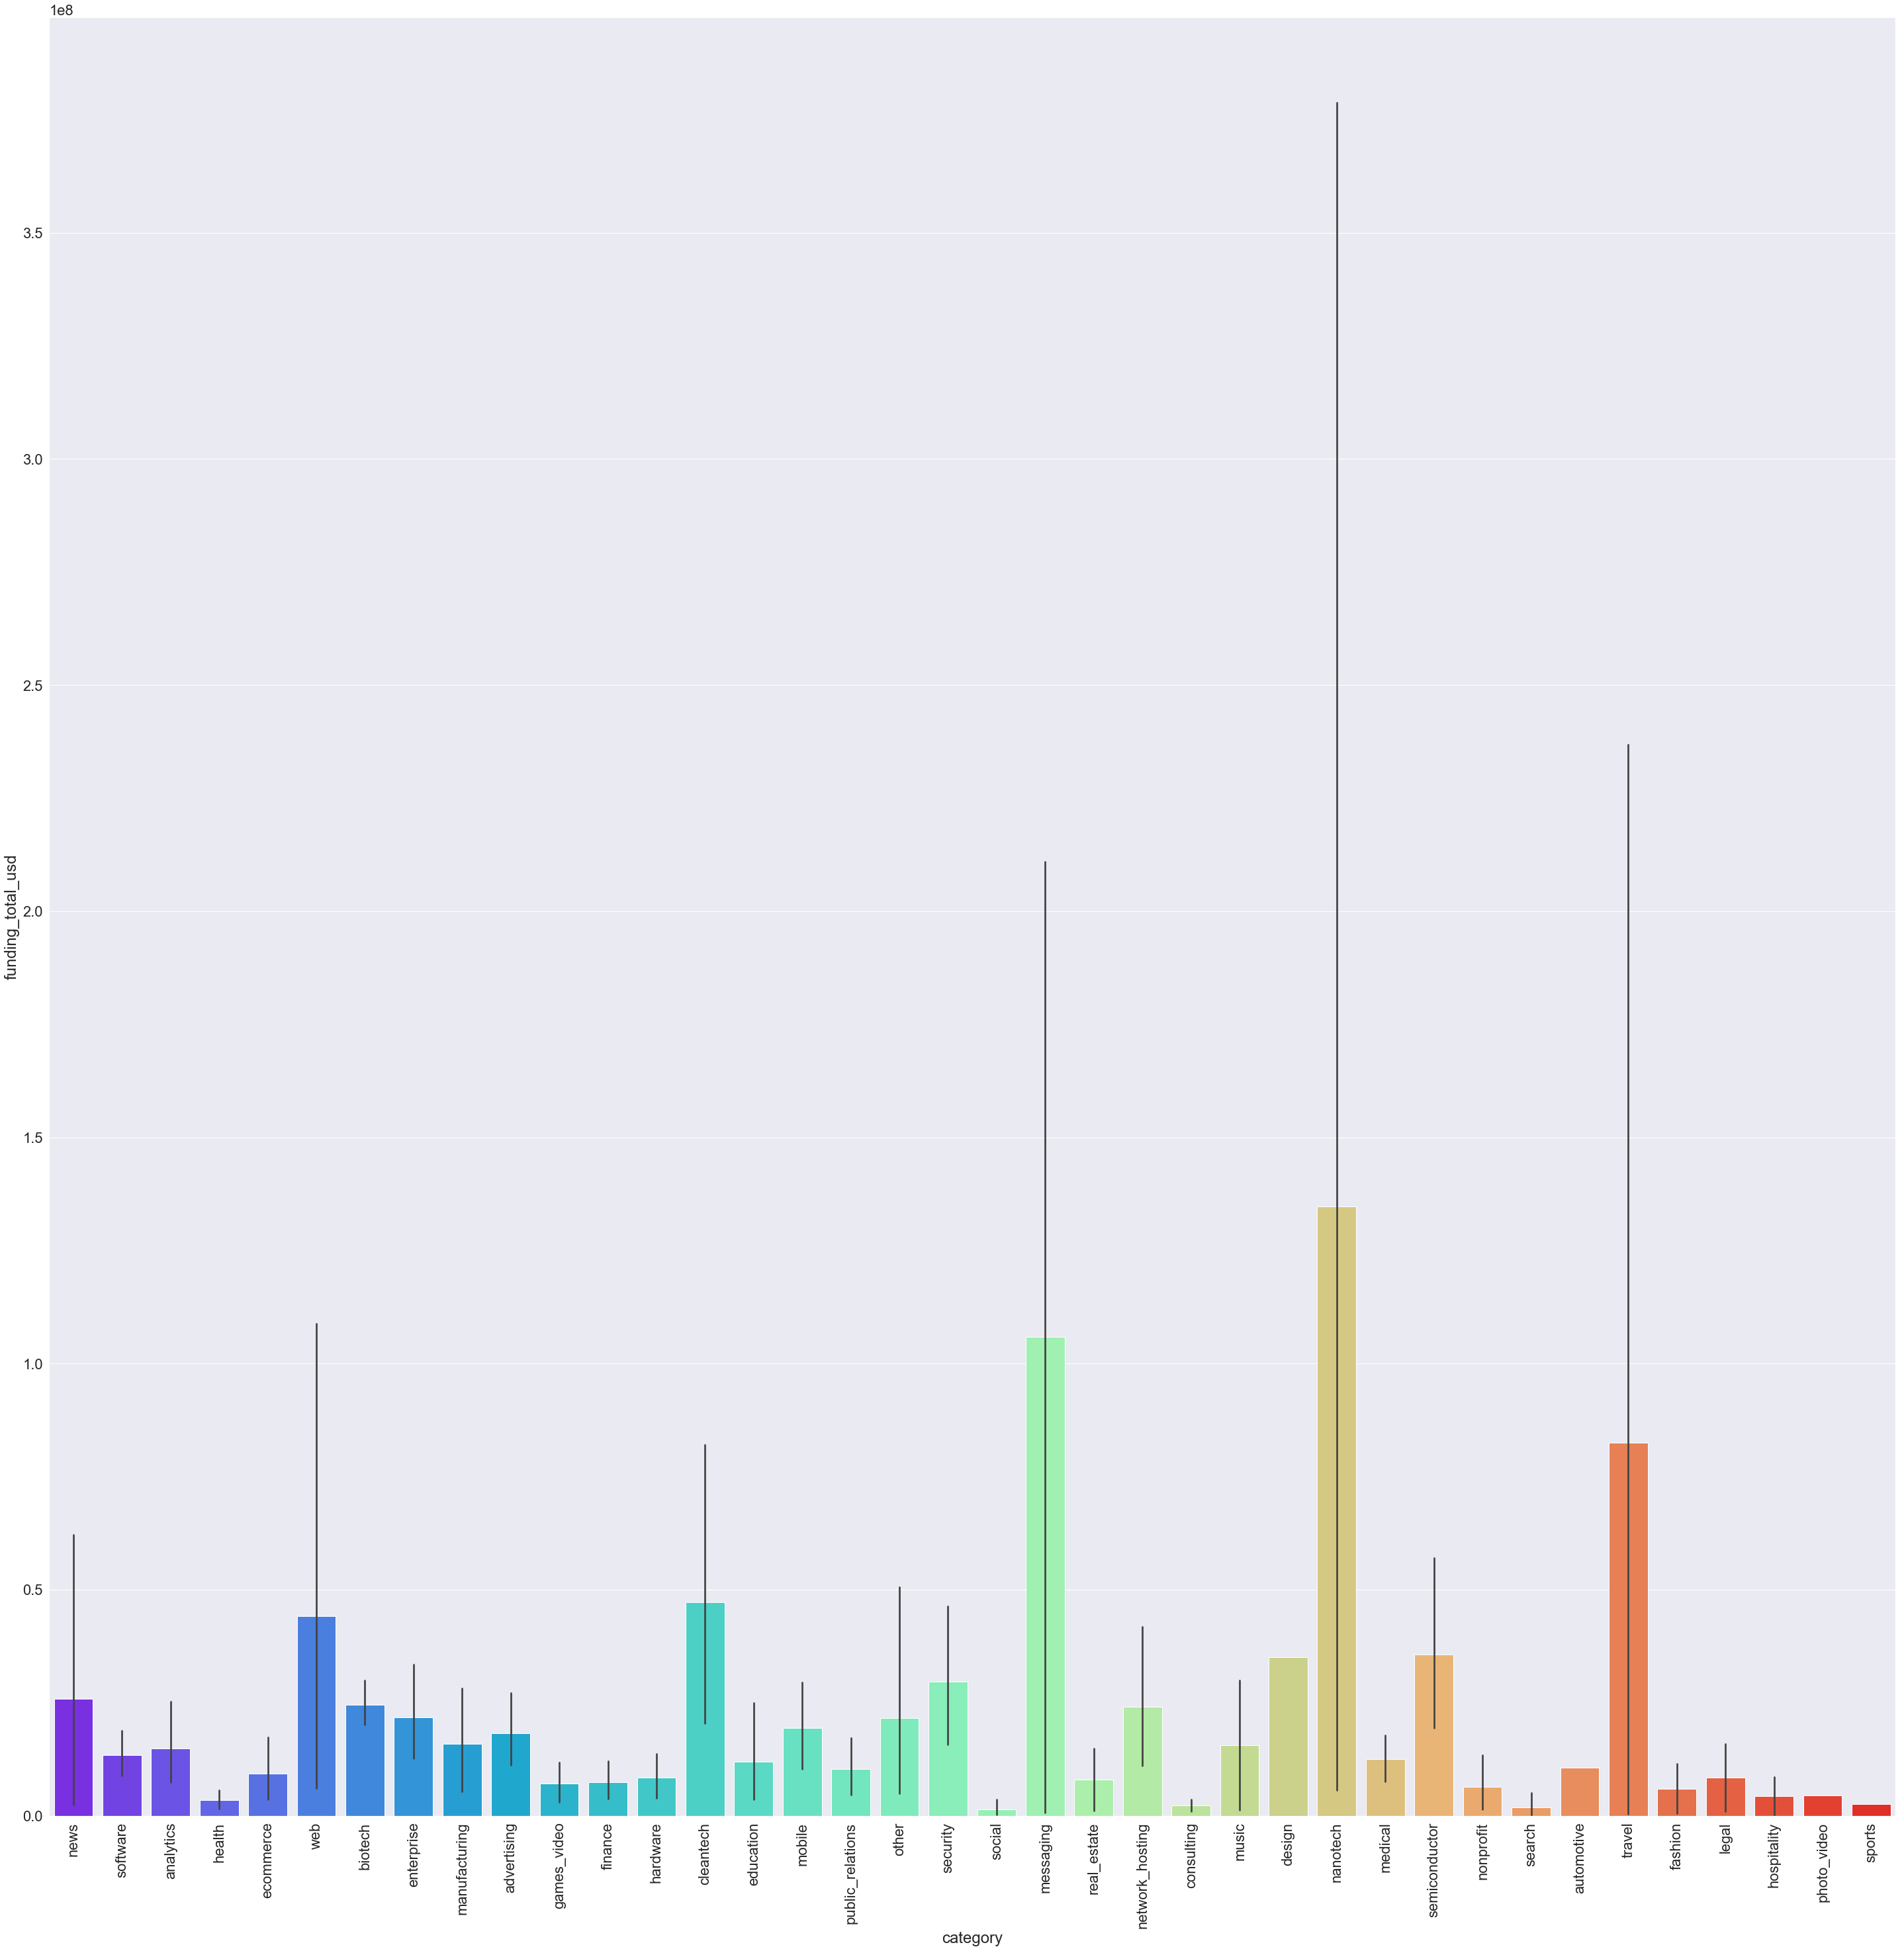

In [186]:
fig2 = sns.barplot(x="category_code", y="funding_total_usd", palette="rainbow", data=df)
plt.xlabel("category")
plt.ylabel("funding_total_usd")
plt.xticks(rotation='vertical')
# plt.title("Schedule Pacing on a weekly basis")
plt.show(fig2)

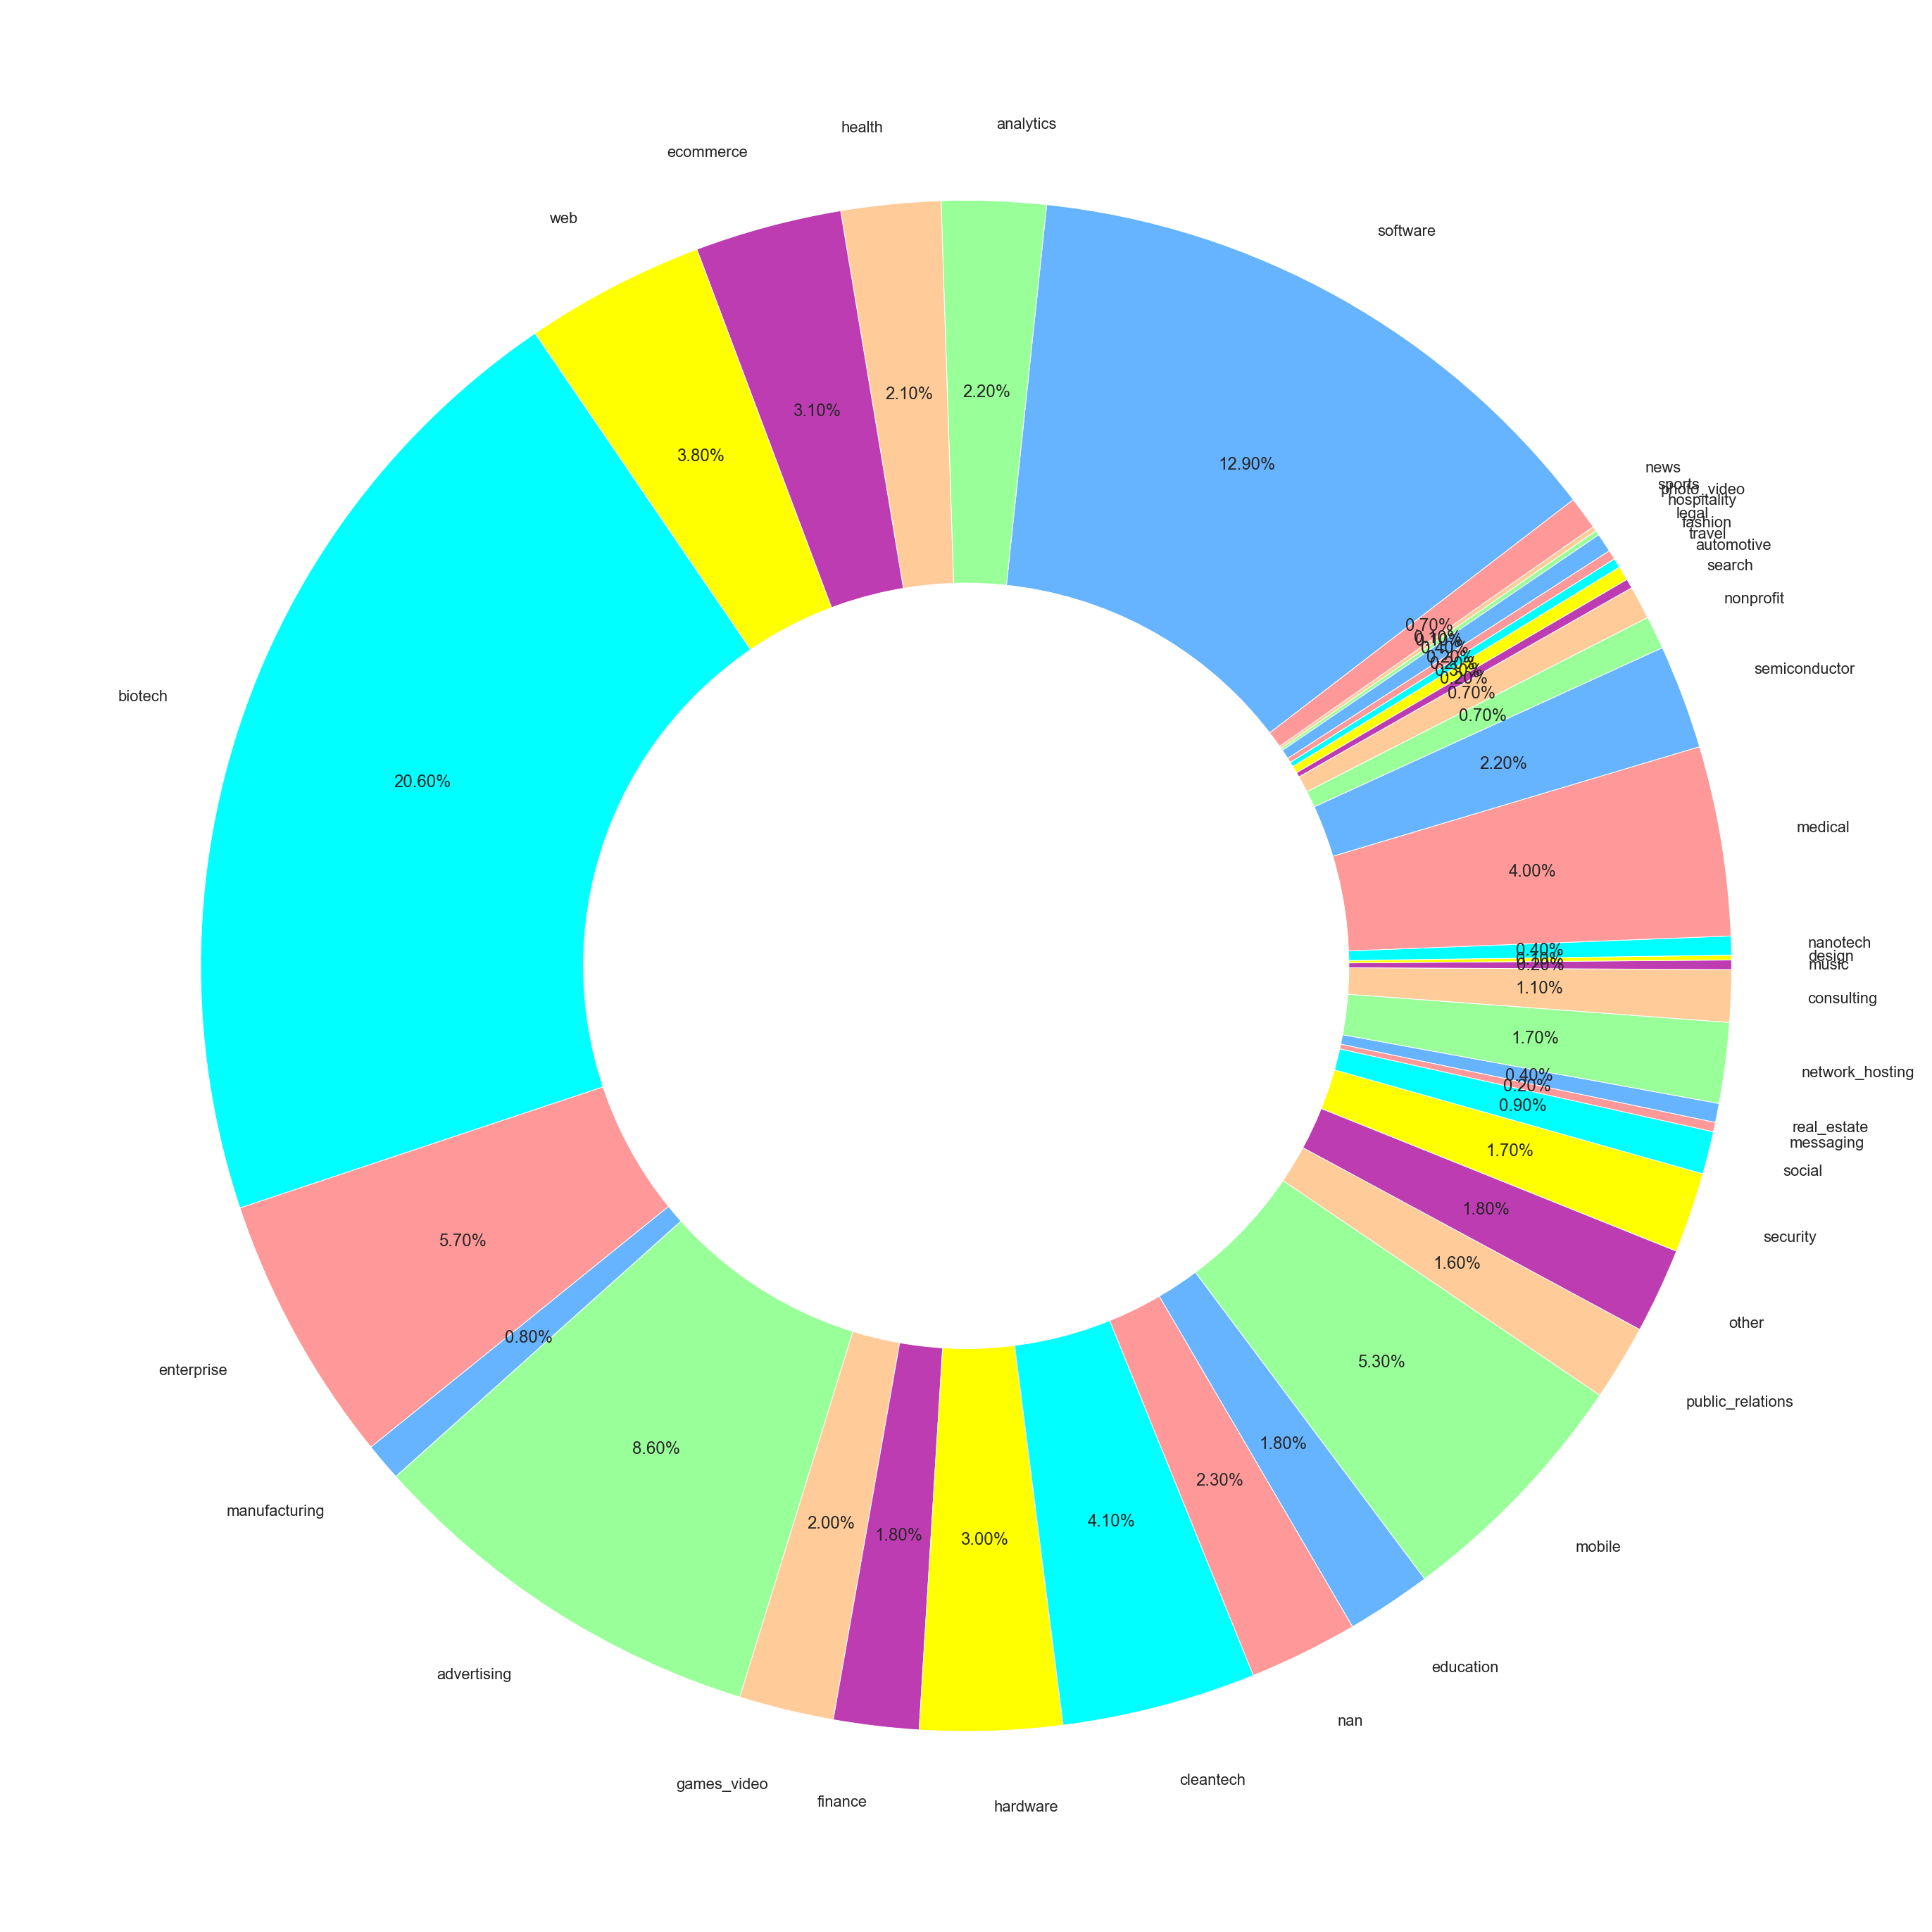

In [219]:
from collections import Counter
counts = Counter(df['category_code'])
top_categories = ['web', 'messaging', 'cleantech', 'nanotech', 'travel']
sums = [counts[cat] for cat in top_categories]
top_categories.append('other')
sums.append(sum(counts.values()) - sum(sums))


labels = counts.keys()
sizes = counts.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75)
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)


## Value counts for the total amount of companies in each category

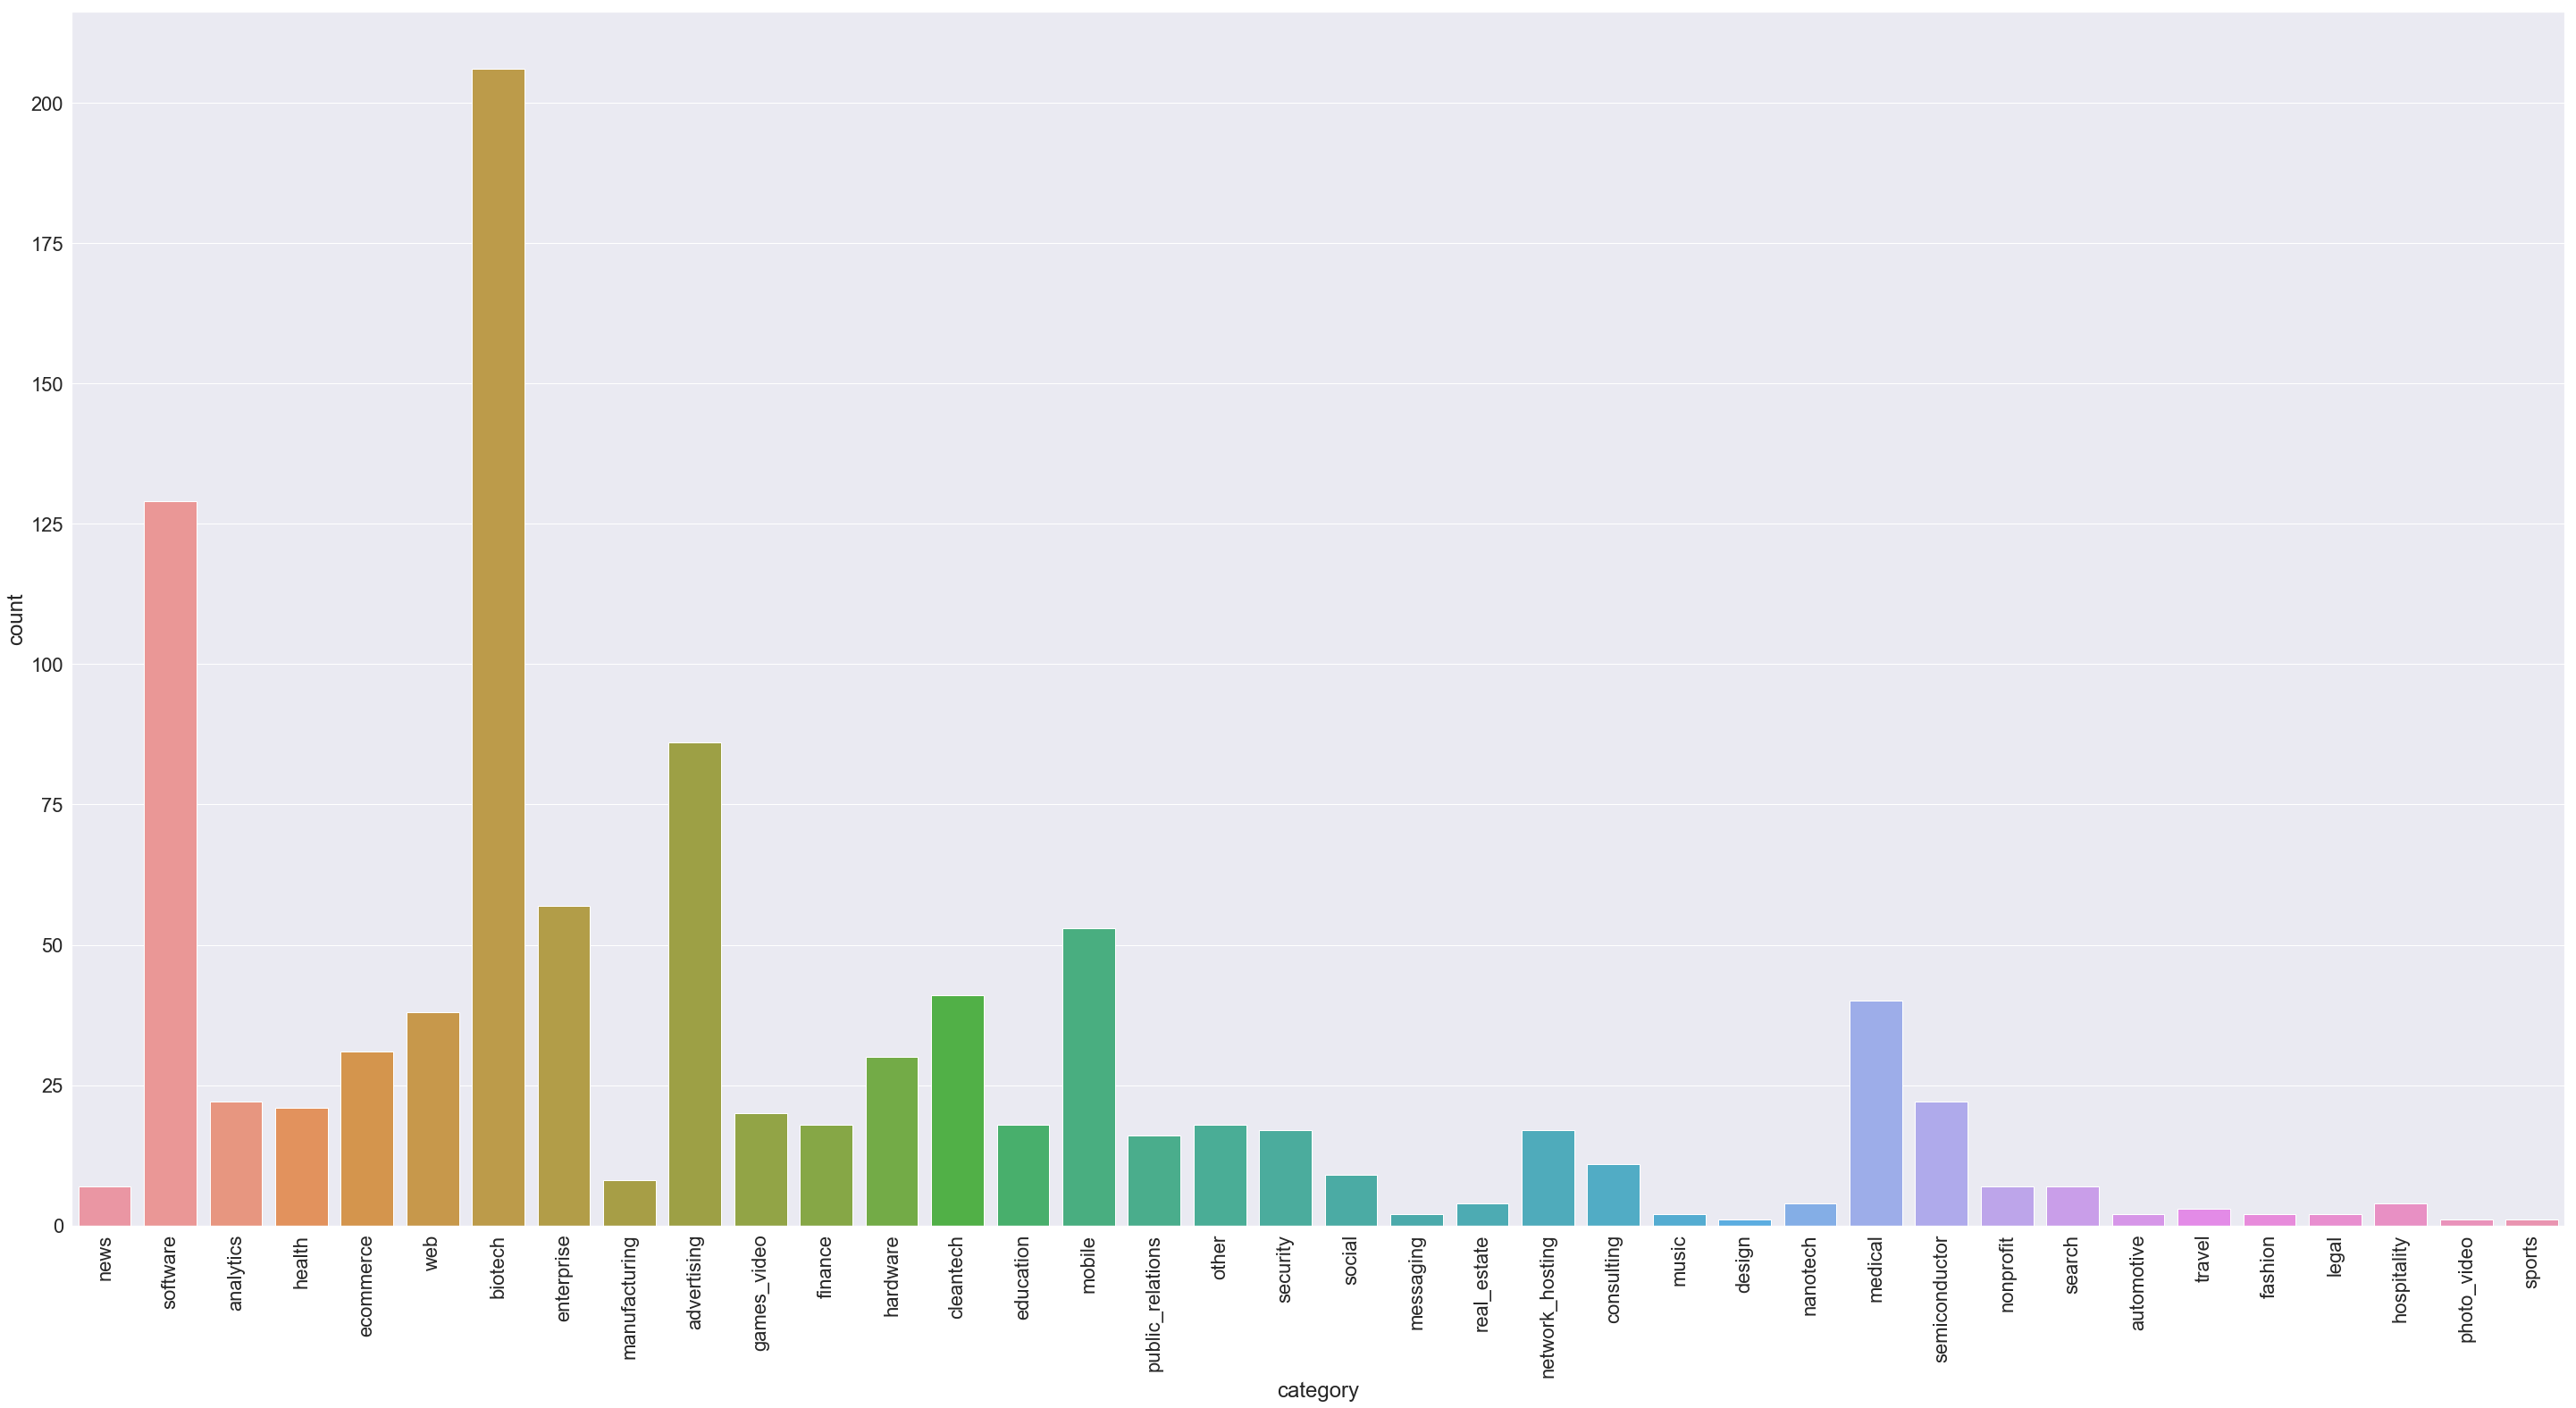

In [68]:
ax = sns.countplot(x="category_code", data=df)
plt.xlabel("category")
plt.ylabel("count")
plt.xticks(rotation='vertical')
# plt.title("Schedule Pacing on a weekly basis")
plt.show(ax)

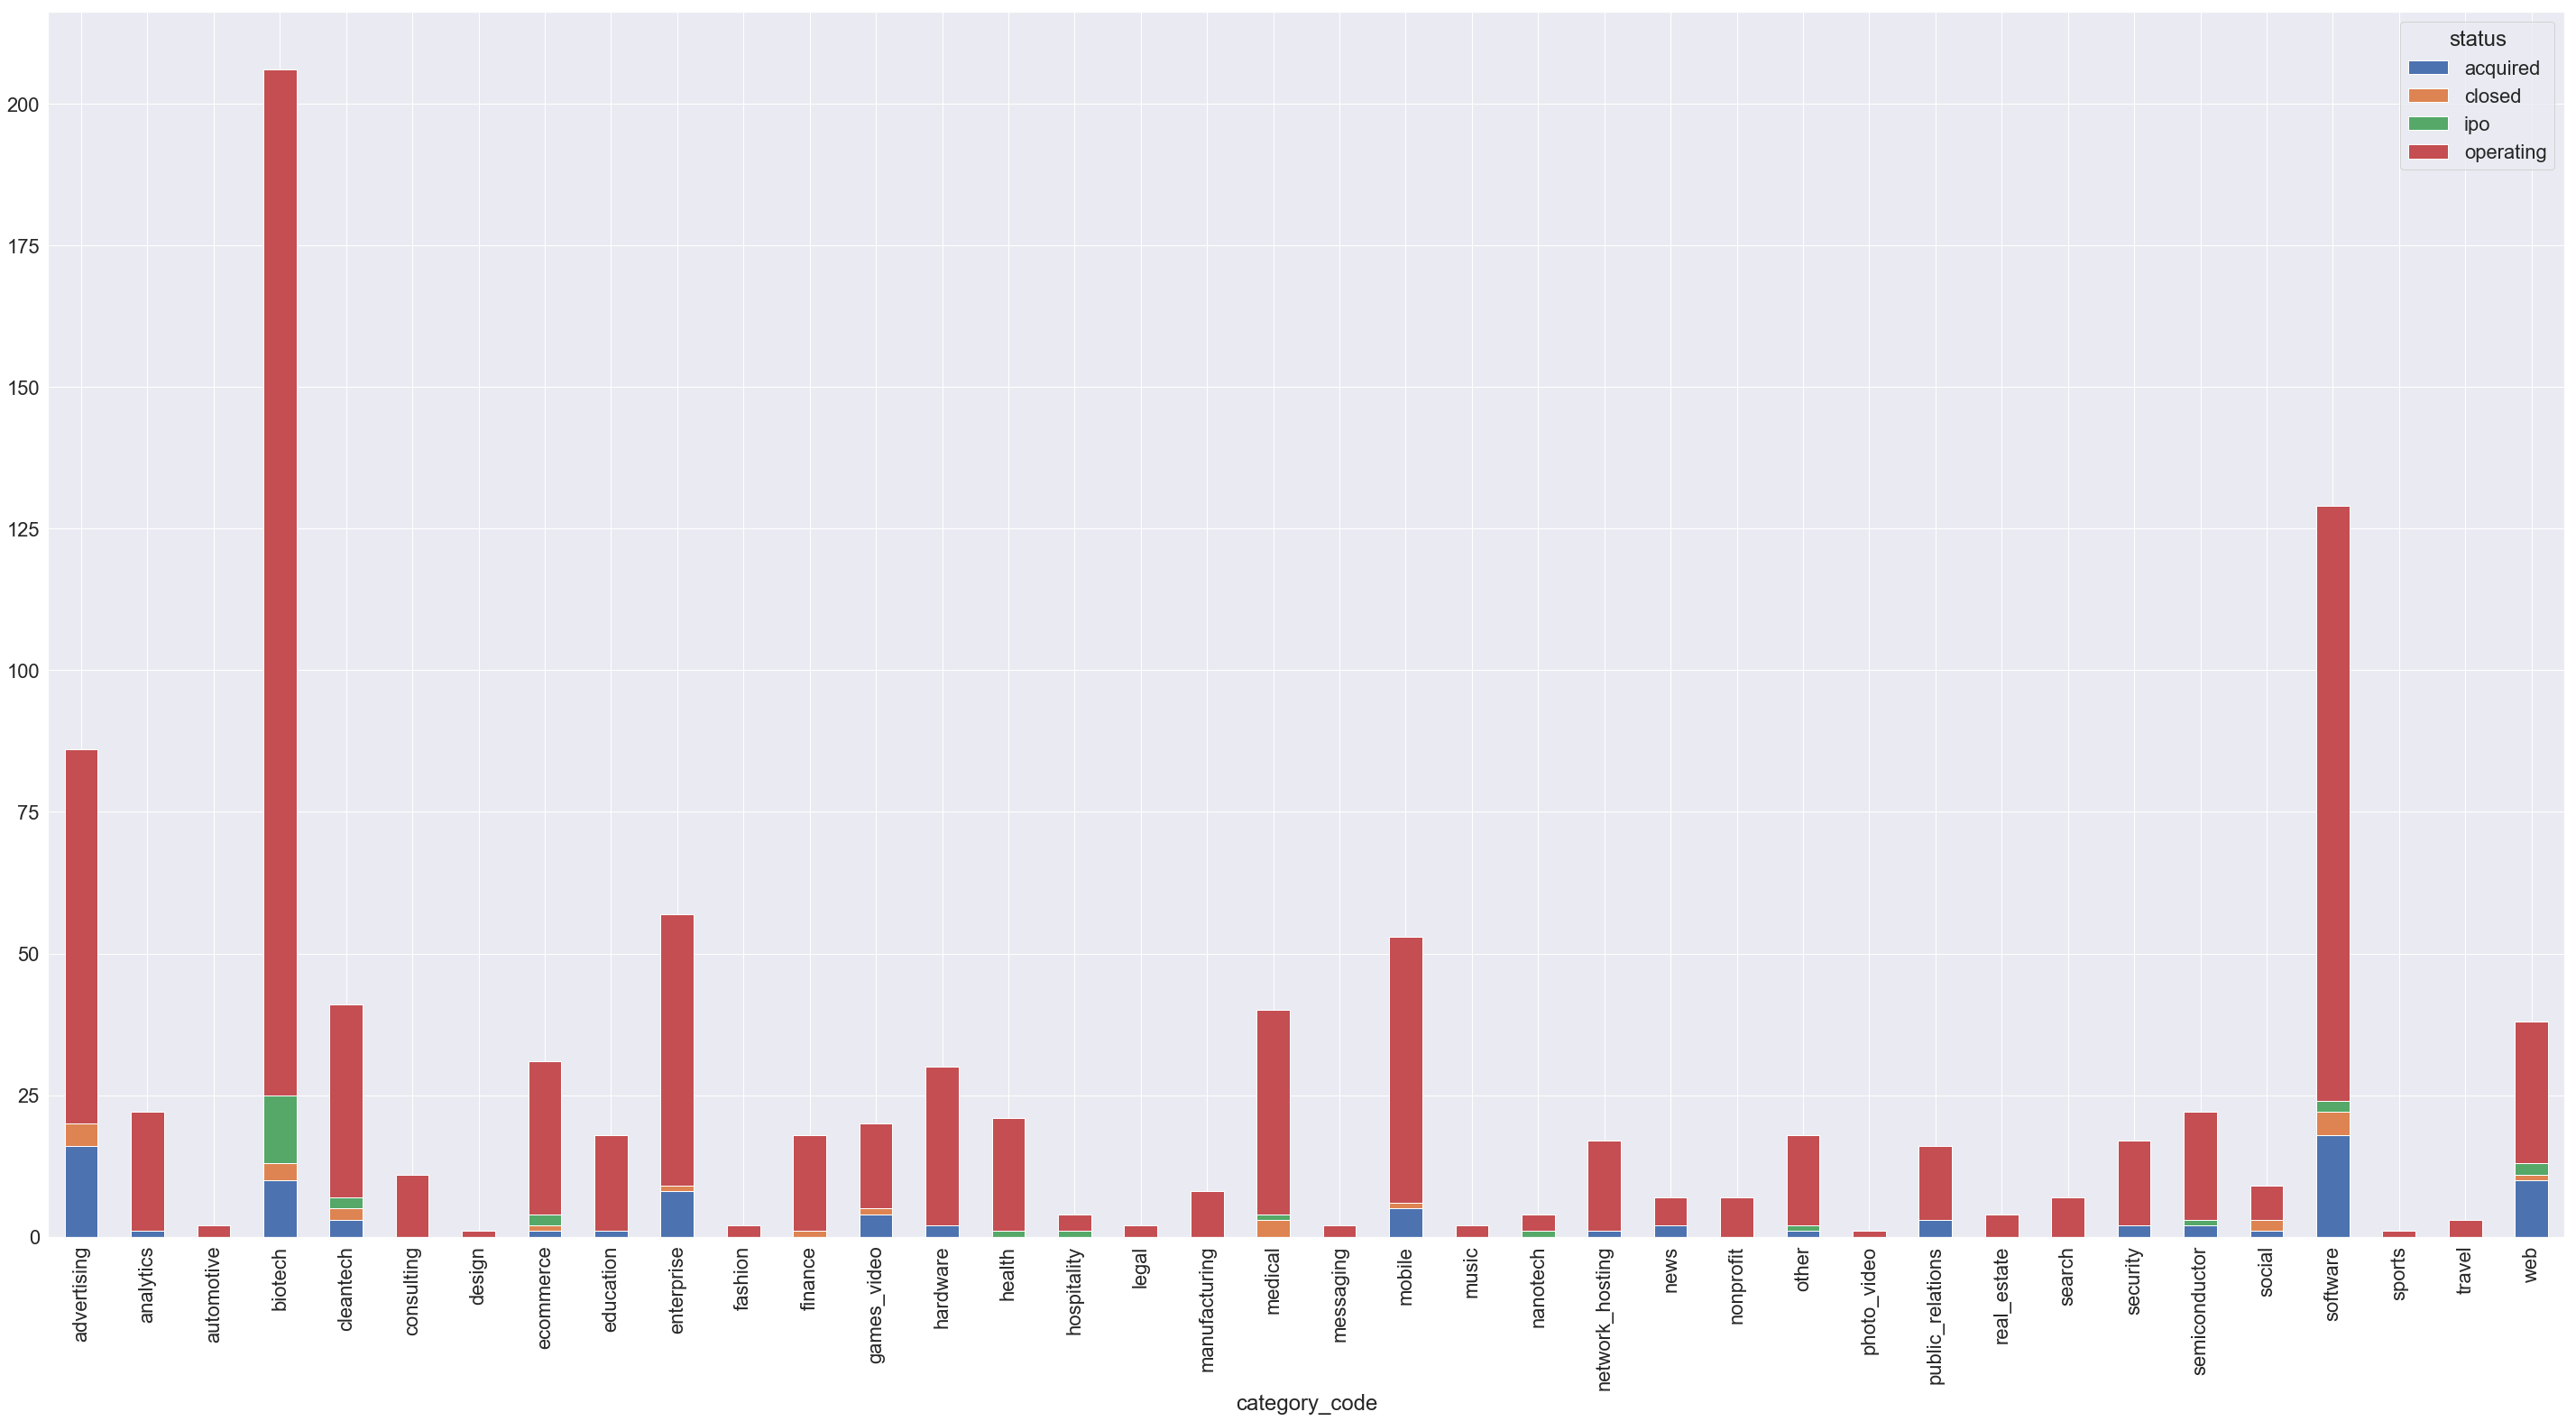

In [81]:
## this is what we want but we just want like the top 10 categories

top_categories = ['web', 'messaging', 'cleantech', 'nanotech', 'travel']

# df.groupby(['A', 'B']).get_group(('web', 'messaging', 'cleantech', 'nanotech', 'travel'))

df.groupby(['category_code'])['status'].value_counts().unstack().plot(kind='bar',stacked=True)


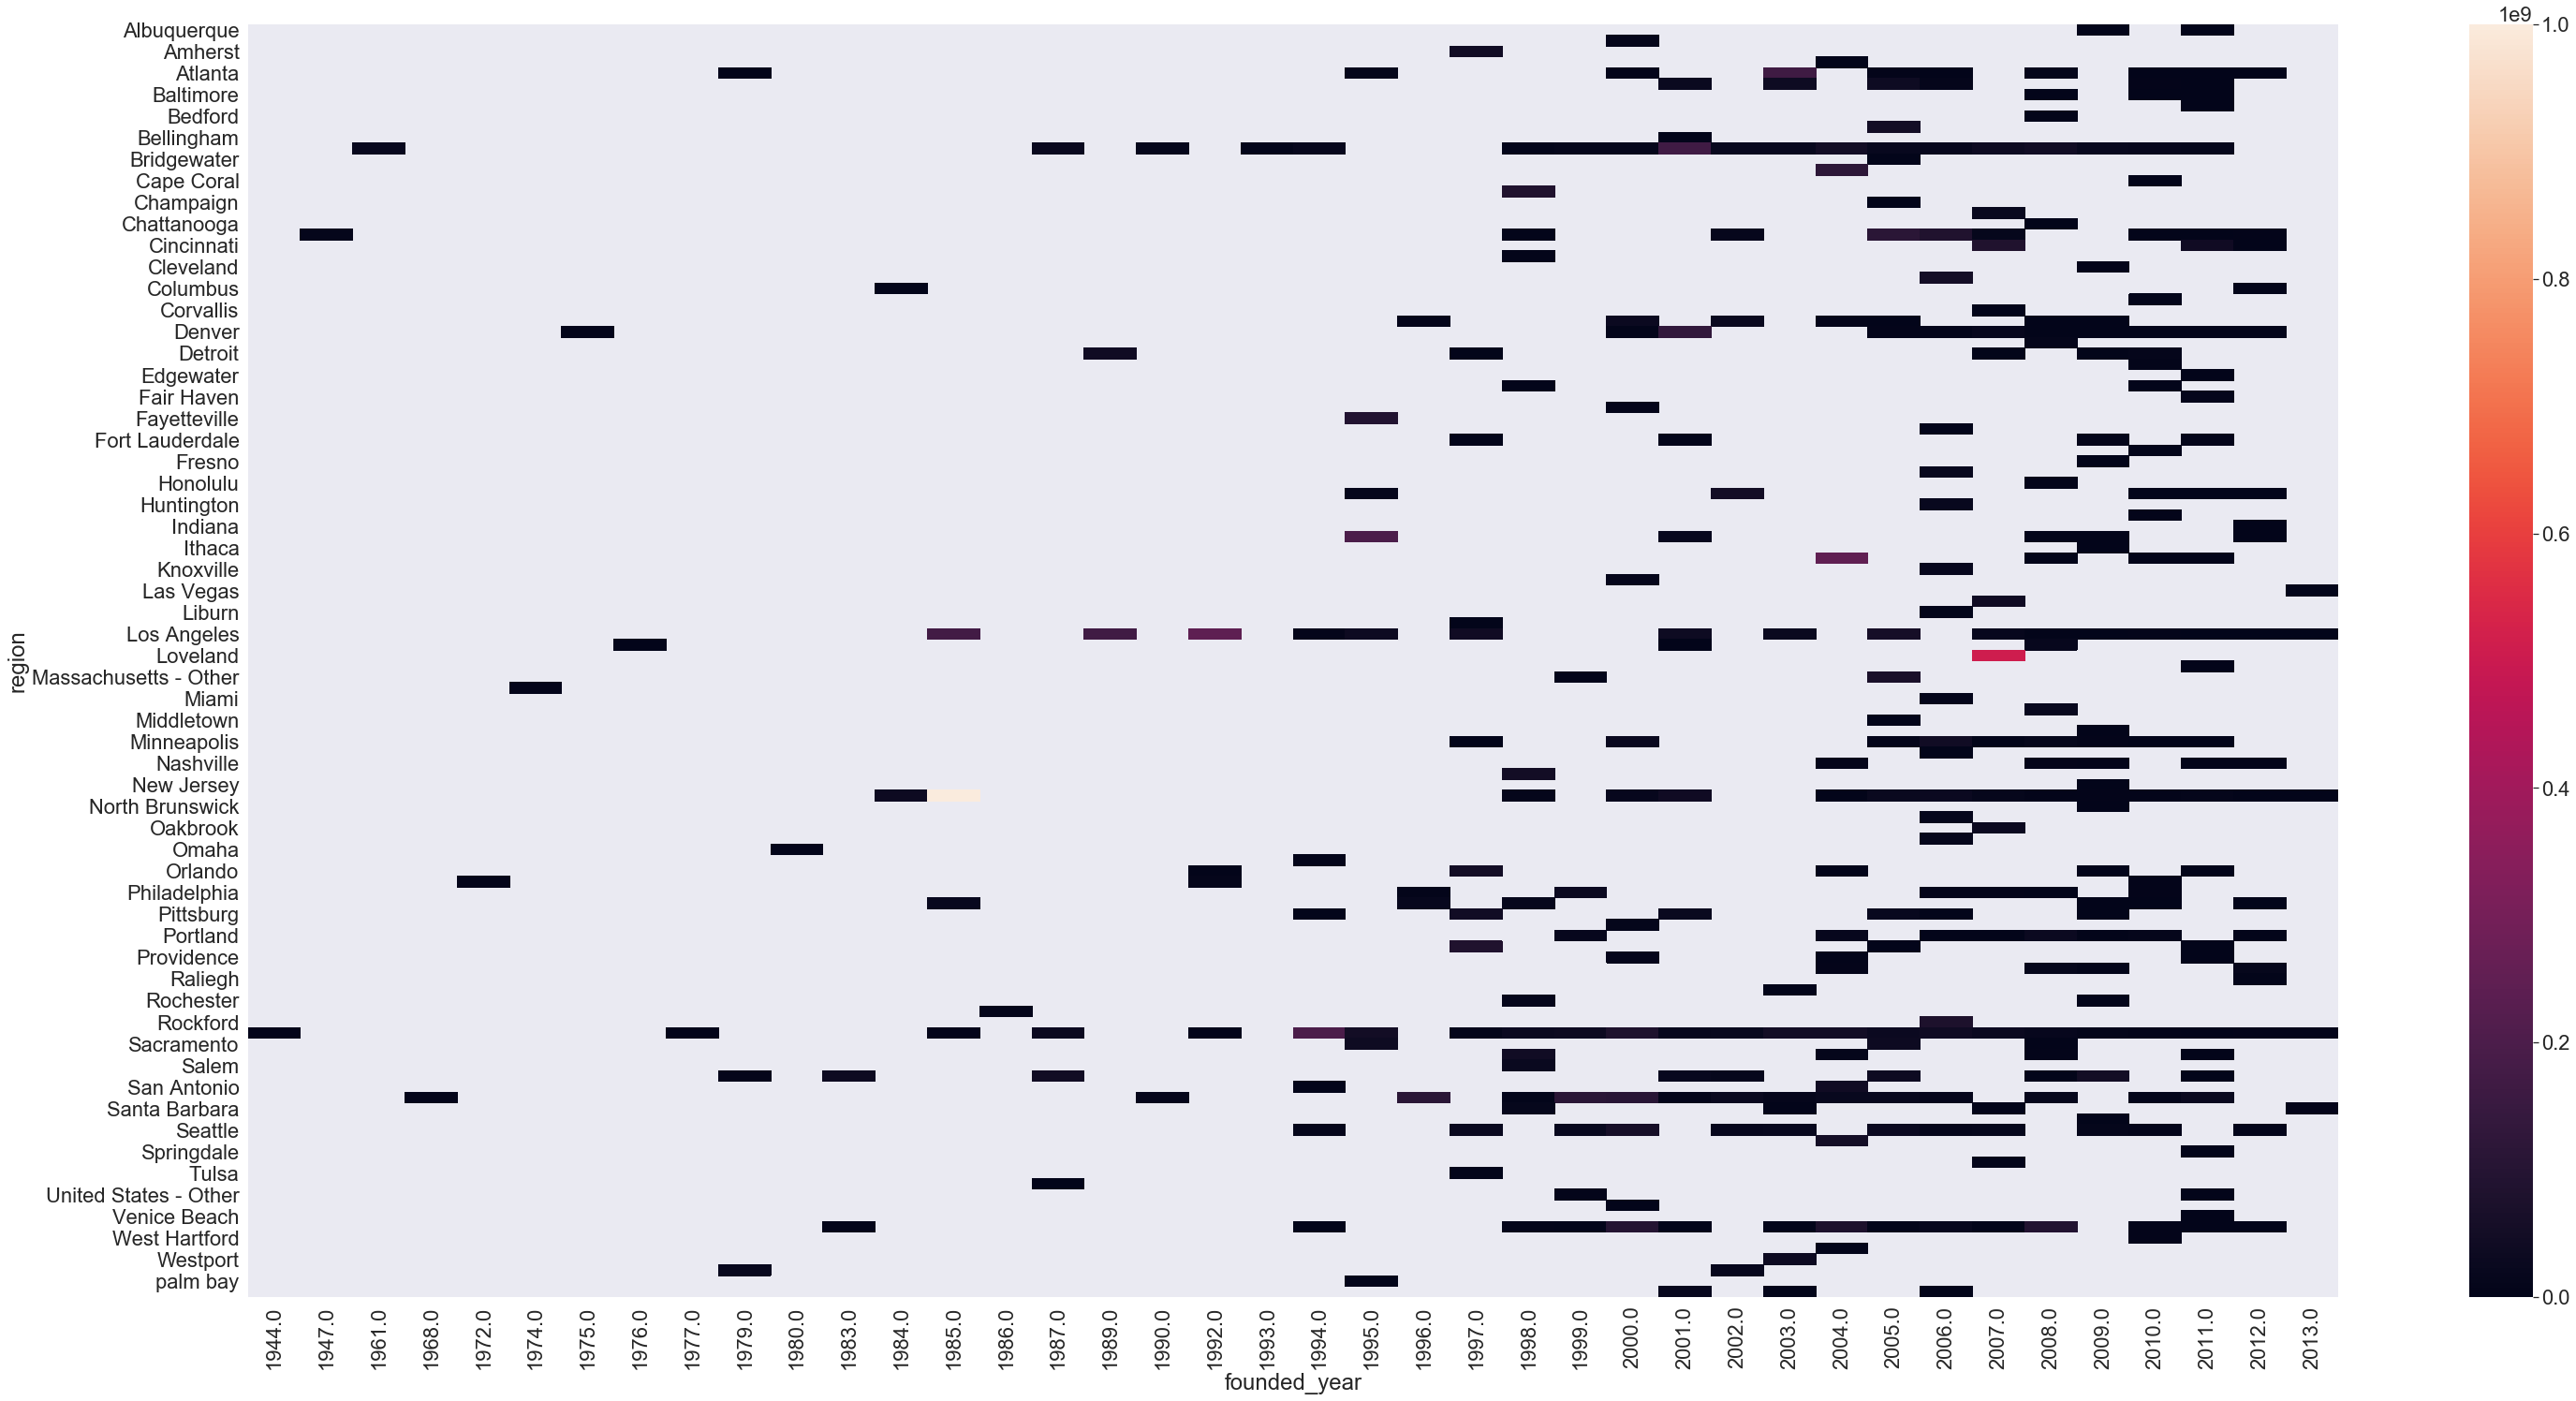

In [91]:
# Create long format
people=np.repeat(("A","B","C","D","E"),5)
feature=list(range(1,6))*5
value=np.random.random(25)
# df4=pd.DataFrame({'feature': feature, 'people': people, 'value': value })
 
# plot it
df_wide=df.pivot_table( index='region', columns='founded_year', values='funding_total_usd' )
p2=sns.heatmap( df_wide )
#sns.plt.show()


In [ ]:
## the following is trash code that was buggy and difficult to get to work

In [ ]:
# sns.distplot(df['funding_total_numeric'].dropna(), hist=True, kde=False, bins=10)
sns.distplot(df[['funding_total_numeric']].dropna(), hist=True, kde=False)

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.bar();

In [ ]:
company_funding_rounds = cdf.groupby('funding_rounds')

def yearly_funding_rounds_avg():
    years = cdf["founded_year"].unique()
    num_bins = len(years)
    for year in years:
        

In [ ]:
# avg = cdf.groupby(['founded_year'])['funding_rounds'].mean().reset_index()
# avg['founded_year'] = avg['founded_year'].astype('int64')


In [ ]:
# def fomating_data(x, pos):
#    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

# def over_time_plot(col):
#    ax = sns.swarmplot(x='funding_rounds', y=col, data=cdf)
#    ax.set(xlabel='funding_rounds')

In [ ]:
# over_time_plot('name')

In [ ]:
# cdf.plot(x='founded_year', y=cdf['funding_rounds'], figsize=(12,5))

In [ ]:
# avg = cdf.groupby(['founded_year'])['funding_rounds'].mean().reset_index()
# avg['founded_year'] = avg['founded_year'].astype('int64')
# avg


# total_per_city = df.groupby(['region'])['funding_total_usd'].mean().reset_index()
# total_per_city['funding_total'] = total_per_city['funding_total_usd'].dropna().astype('int64')
# total_per_city= total_per_city.drop(columns=['funding_total_usd'])


In [ ]:


# df = df.drop(columns=['permalink', 'name', 'country_code', 'city', 'founded_at', 'founded_year', 'first_funding_at', 'last_funding_at', 'last_milestone_data'])
# sns.heatmap(df.corr(), annot=True)

# def pearson_corr(x, y):
#     x_mean = np.mean(x)
#     y_mean = np.mean(y)
#     num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
#     den_1 = [(i - x_mean)**2 for i in x]
#     den_2 = [(j - y_mean)**2 for j in y]
#     correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
#     return correlation_x_y

# print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
# print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))